In [1]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

!apt-get install pkg-config lua5.1 build-essential libav-tools git

!pip install tqdm retrowrapper gym-retro
!pip install -U git+git://github.com/frenchie4111/dumbrain.git

from dumbrain.rl.retro_contest.install_games import colabInstallGames
colabInstallGames()

!python -m dumbrain.rl.retro_contest.install_games http://aiml.mikelyons.org/datasets/sonic/Sonic%20Roms.zip 
!python -m atari_py.import_roms '/content/data/roms/ROMS/'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package libav-tools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  ffmpeg

E: Package 'libav-tools' has no installation candidate
  Using cached retrowrapper-0.3.0-py3-none-any.whl (4.2 kB)
     |████████████████████████████████| 162.0 MB 25 kB/s 
  Cloning git://github.com/frenchie4111/dumbrain.git to /tmp/pip-req-build-0nlo3aon
  Running command git clone -q git://github.com/frenchie4111/dumbrain.git /tmp/pip-req-build-0nlo3aon
  Created wheel for dumbrain: filename=dumbrain-0.1-py3-none-any.whl size=12227 sha256=26fe3de24fbcf298b9ee9a7104821be8951924105d41e717cac2eaf19a6808ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-j3nbr4wg/wheels/b5/27/9e/18a923de02e8a4e689c558b14ff67e5bb29dd81547b453df3c
Successfully built dumbrain
Direc

Saving ROMS.zip to ROMS.zip


100%|██████████| 12228402/12228402 [00:00<00:00, 28222754.68it/s]


Imported 0 games
Namespace(download_url='http://aiml.mikelyons.org/datasets/sonic/Sonic%20Roms.zip', romdir='data/roms/')
3694592it [00:00, 35953573.85it/s]                 
100% 5767168/5767168 [00:00<00:00, 93666043.80it/s]
Importing SonicTheHedgehog2-Genesis
Importing SonicTheHedgehog-Genesis
Importing SonicAndKnuckles3-Genesis
Imported 3 games
copying jamesbond.bin from /content/data/roms/ROMS/James Bond 007 (James Bond Agent 007) (1984) (Parker Brothers - On-Time Software, Joe Gaucher, Louis Marbel) (PB5110) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/jamesbond.bin
copying qbert.bin from /content/data/roms/ROMS/Q-bert (1983) (Parker Brothers - Western Technologies, Dave Hampton, Tom Sloper) (PB5360) ~.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/qbert.bin
copying time_pilot.bin from /content/data/roms/ROMS/Time Pilot (1983) (Coleco - Woodside Design Associates, Harley H. Puthuff Jr.) (2663) ~.bin to /usr/local/lib/python3.7/dist-package

In [9]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def get_grayImage(observation):
  return cv2.cvtColor(observation, cv2.COLOR_RGB2GRAY)

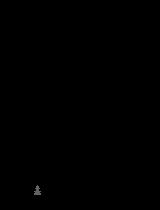

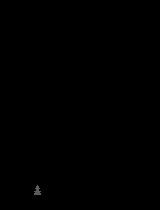

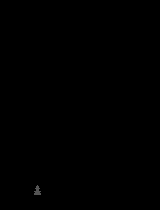

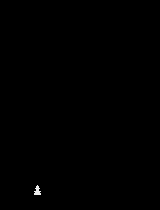

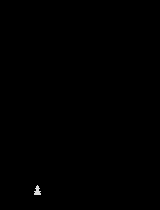

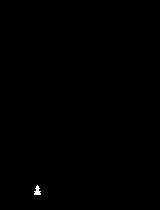

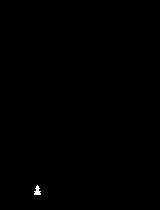

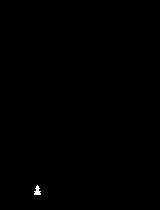

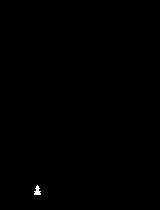

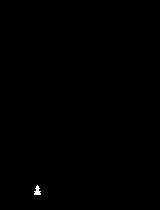

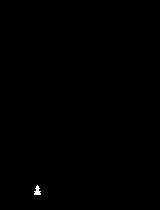

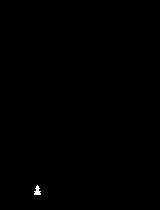

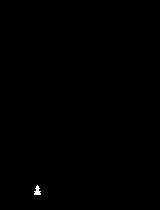

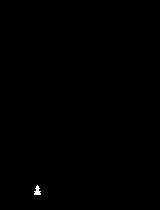

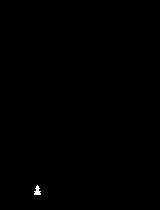

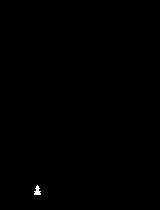

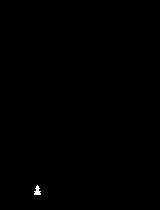

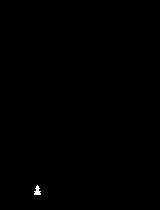

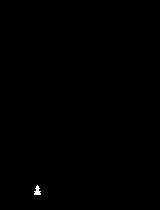

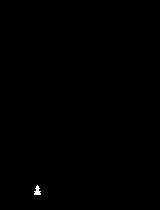

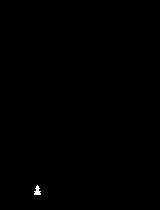

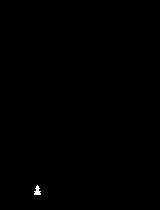

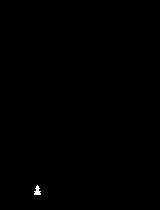

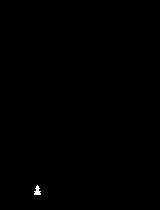

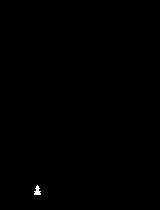

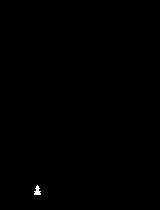

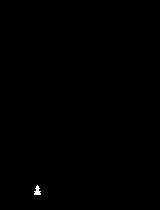

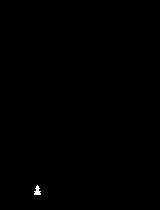

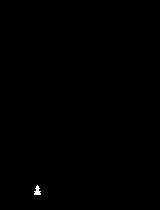

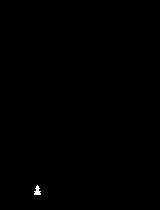

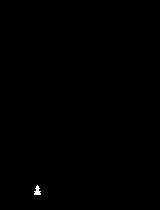

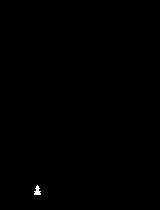

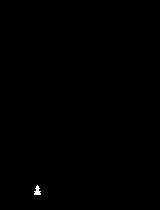

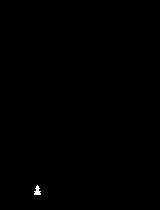

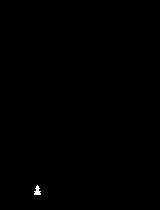

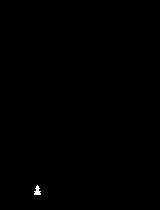

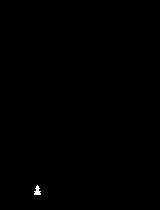

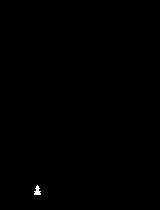

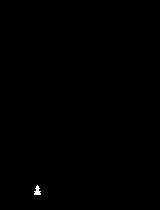

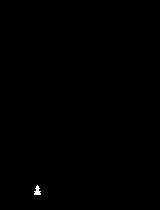

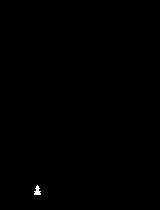

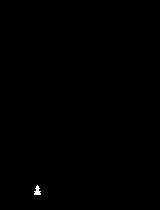

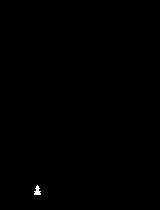

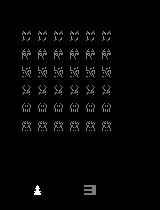

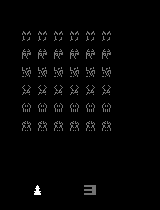

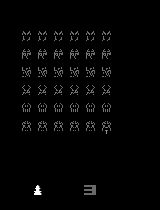

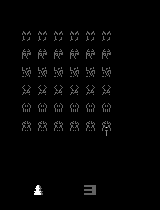

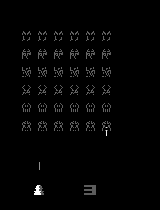

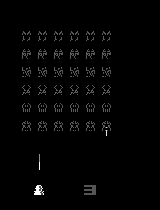

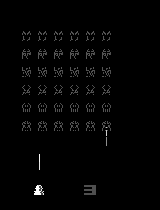

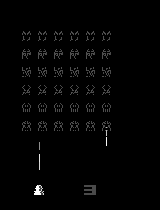

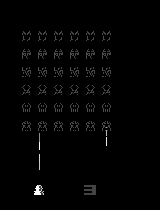

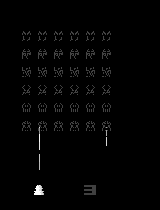

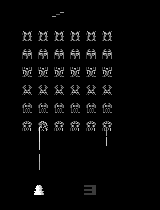

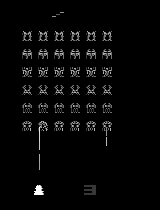

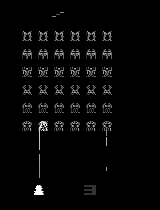

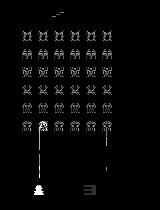

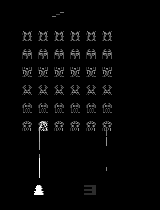

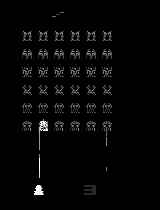

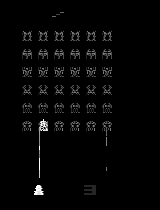

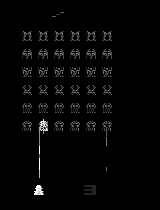

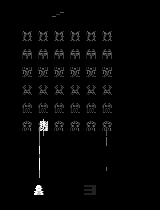

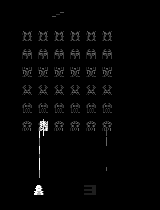

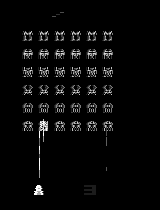

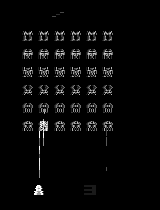

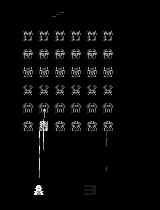

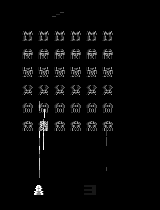

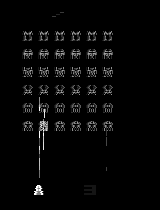

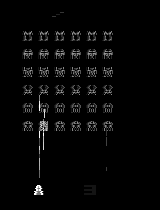

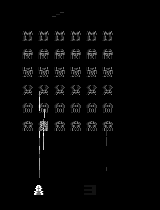

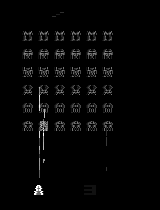

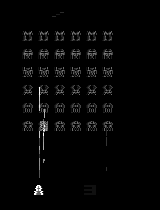

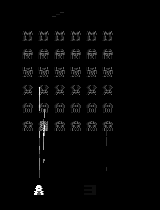

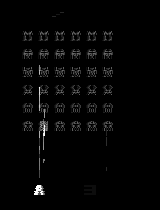

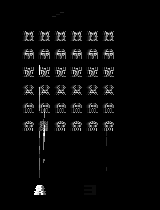

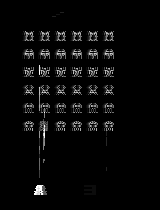

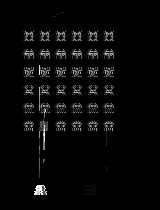

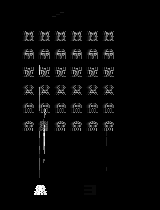

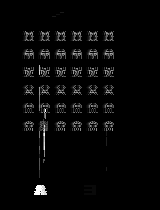

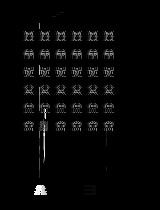

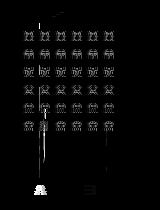

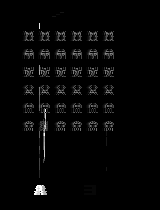

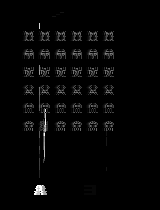

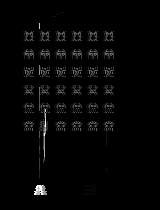

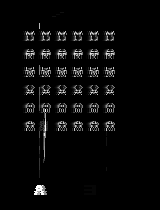

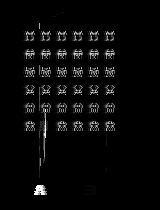

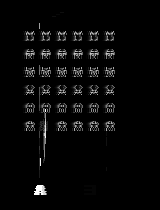

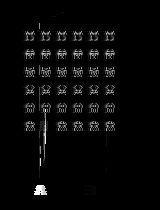

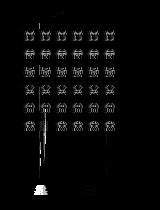

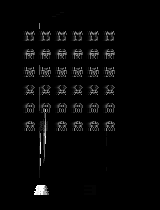

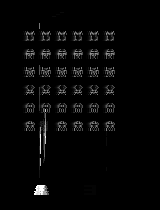

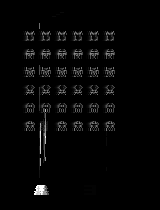

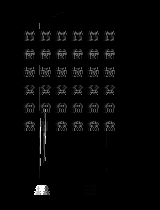

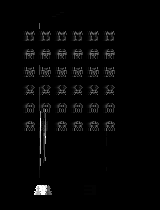

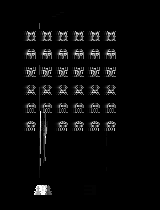

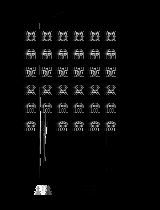

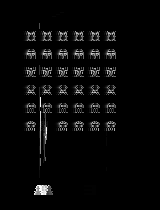

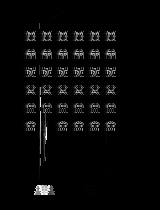

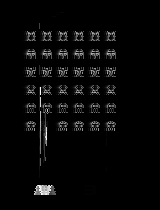

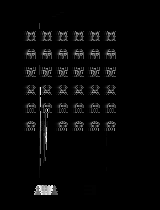

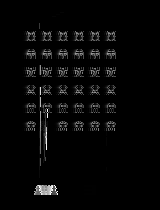

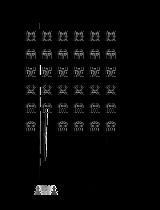

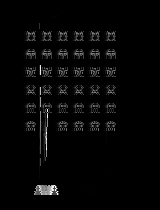

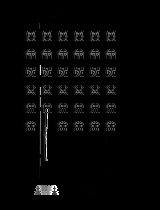

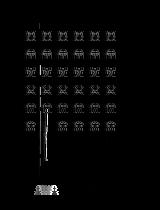

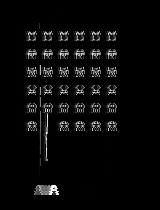

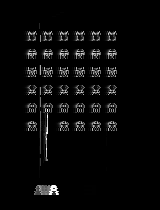

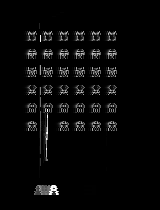

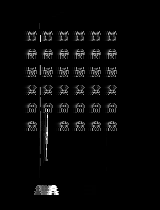

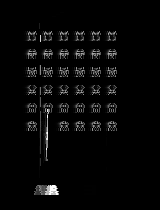

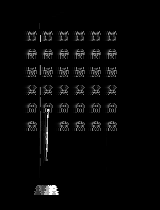

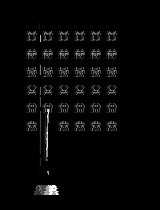

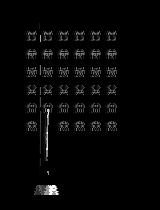

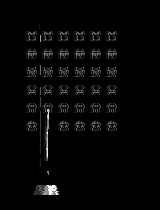

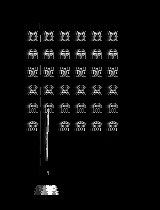

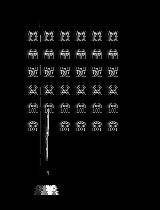

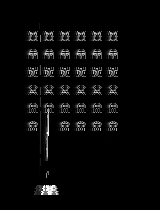

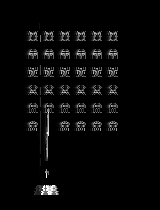

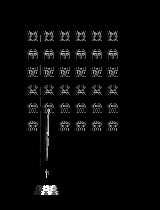

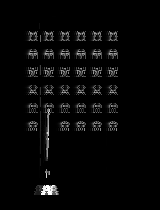

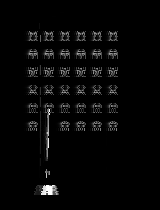

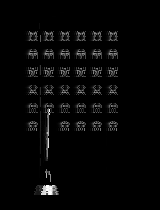

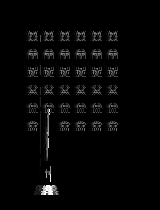

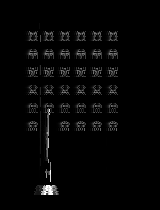

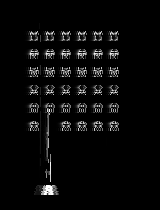

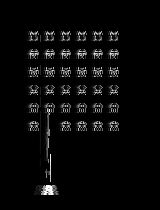

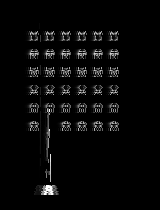

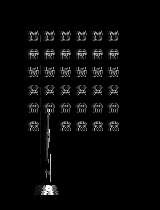

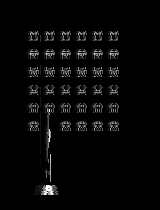

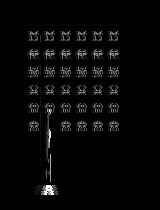

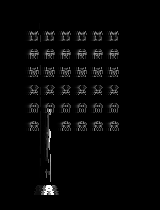

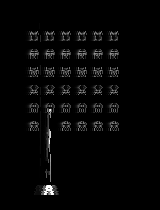

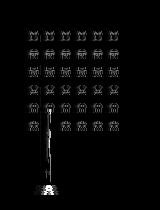

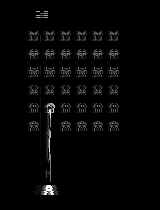

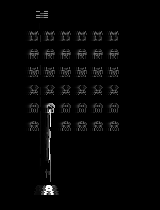

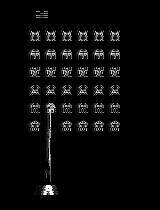

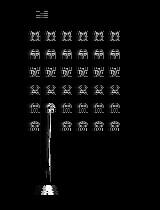

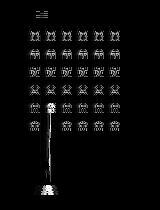

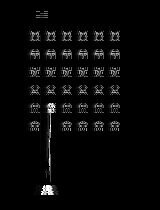

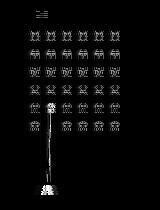

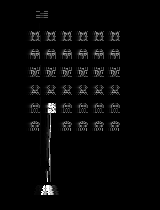

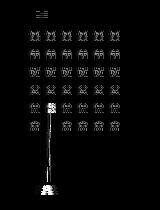

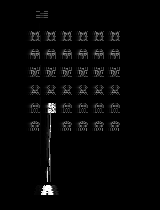

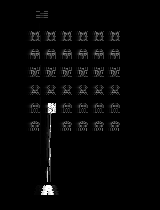

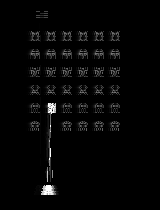

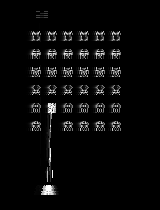

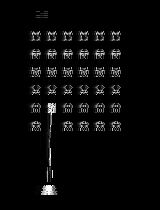

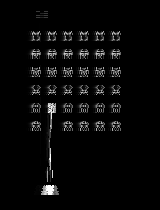

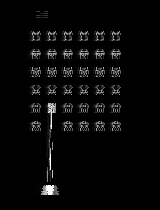

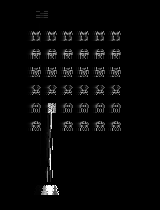

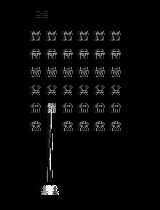

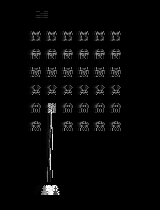

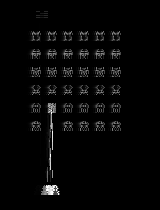

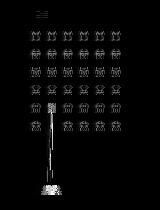

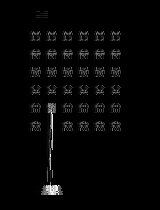

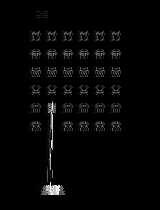

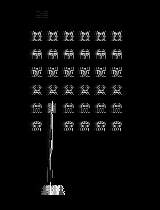

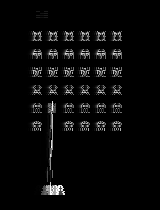

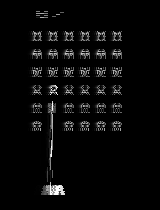

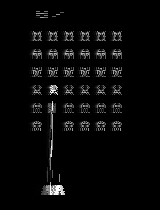

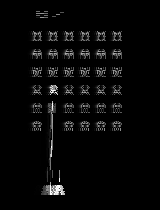

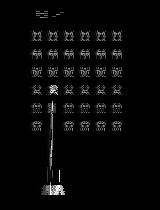

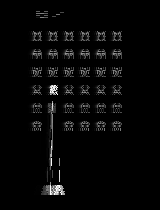

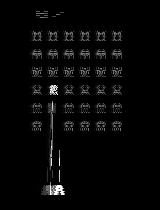

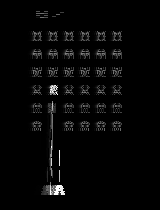

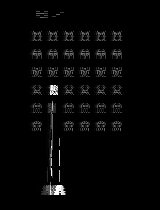

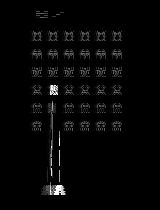

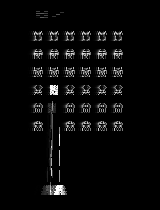

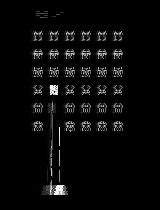

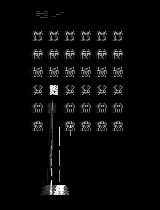

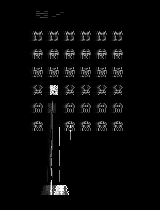

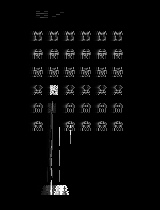

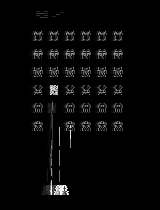

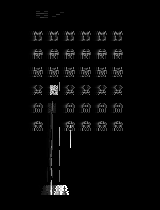

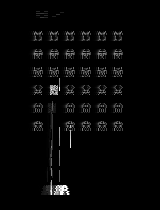

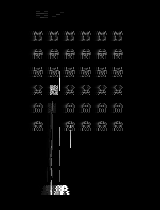

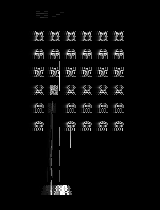

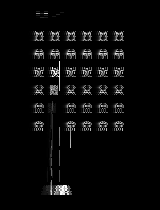

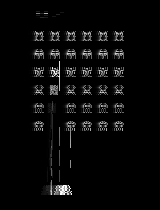

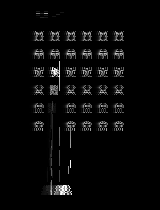

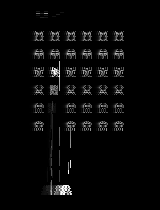

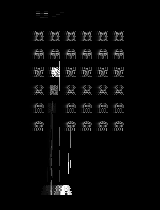

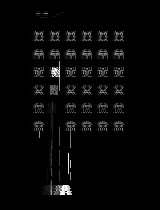

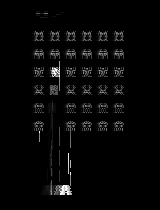

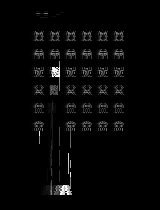

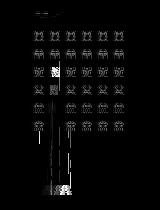

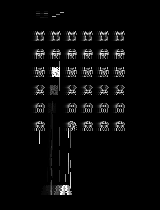

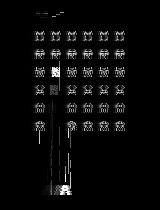

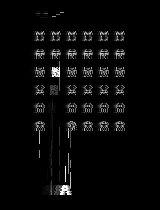

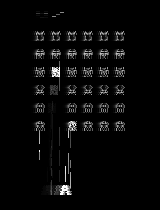

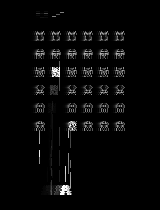

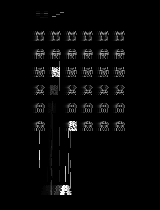

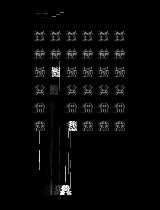

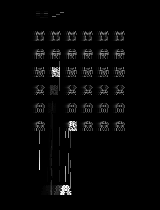

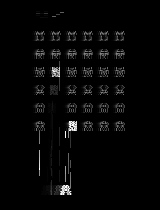

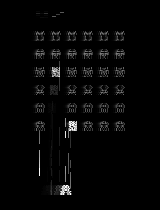

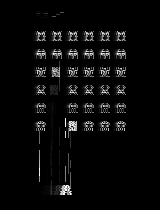

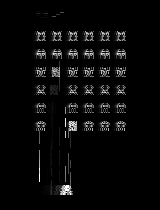

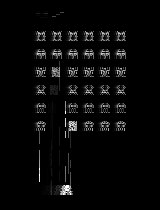

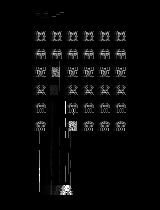

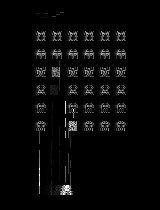

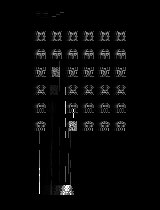

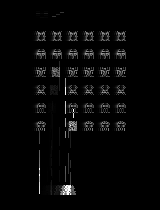

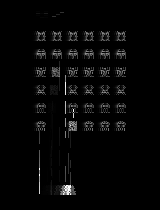

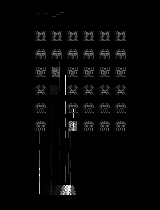

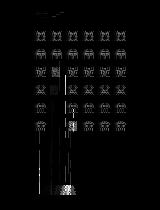

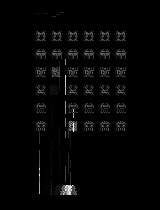

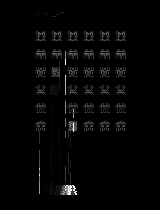

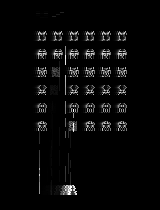

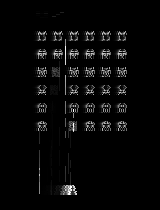

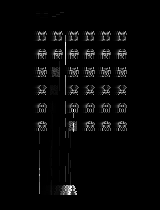

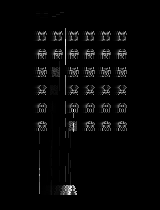

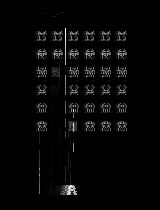

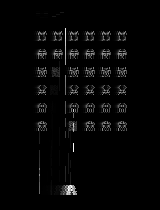

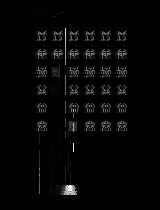

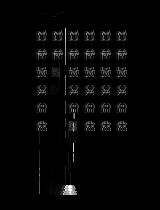

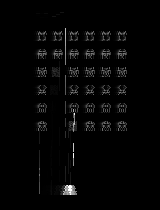

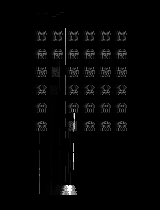

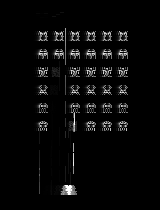

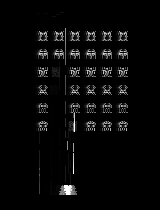

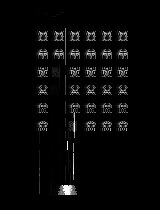

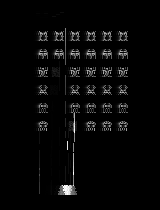

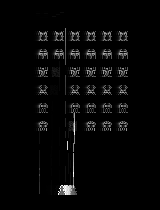

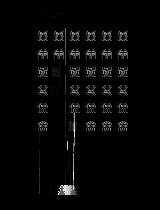

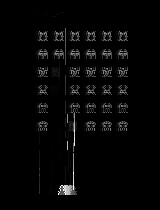

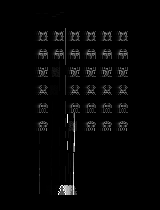

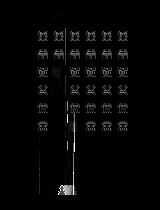

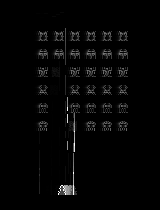

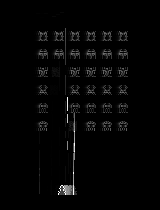

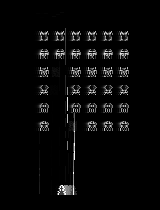

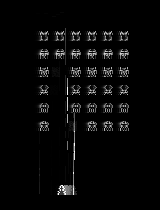

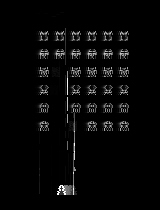

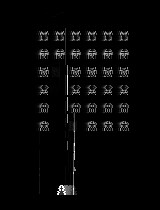

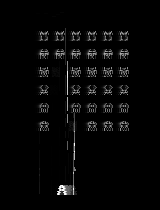

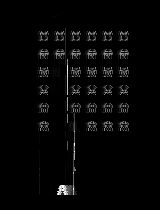

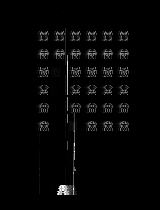

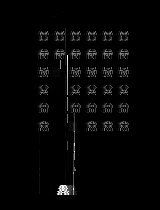

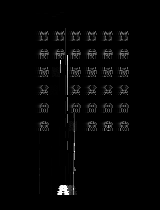

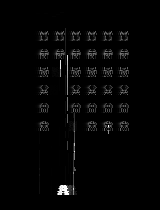

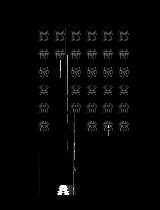

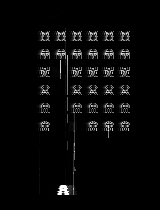

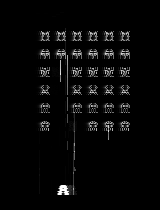

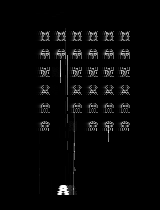

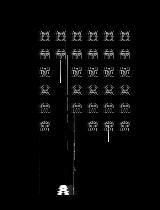

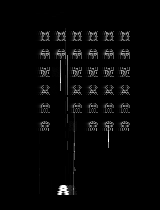

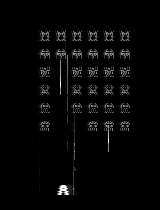

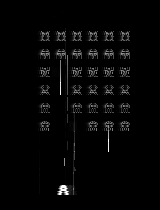

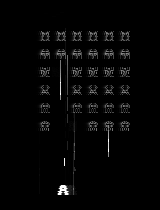

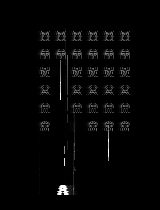

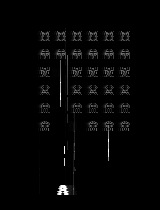

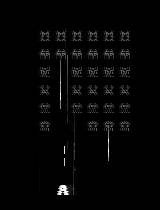

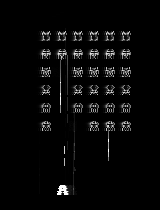

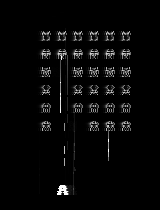

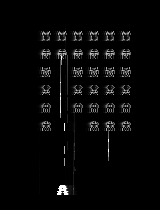

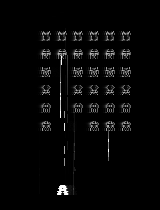

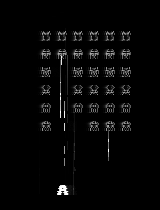

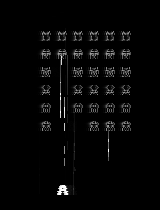

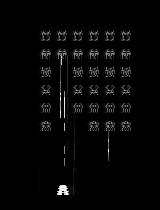

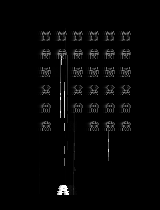

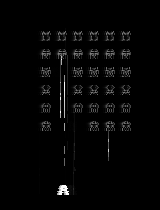

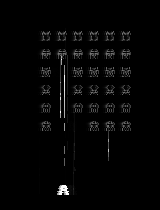

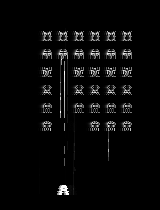

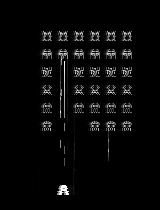

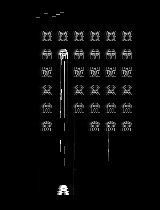

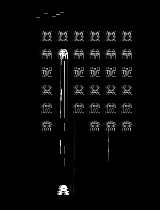

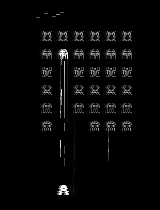

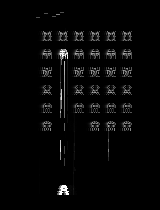

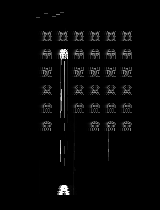

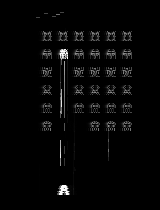

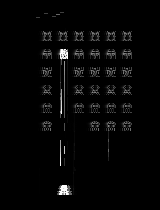

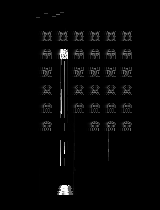

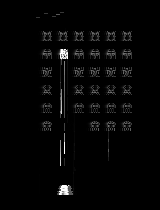

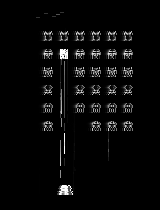

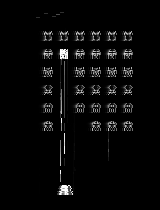

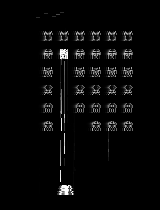

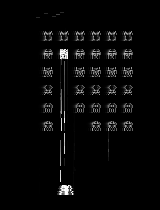

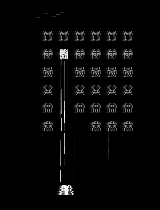

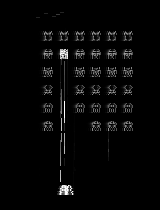

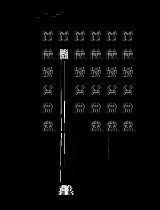

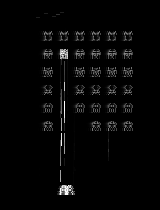

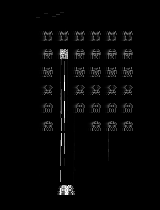

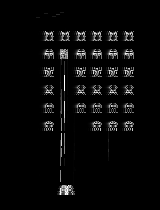

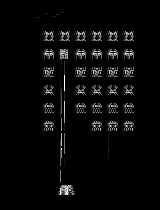

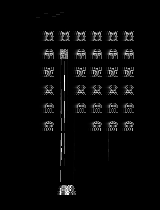

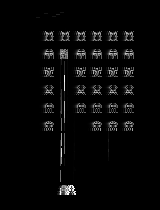

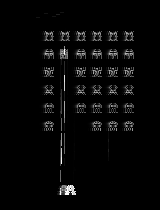

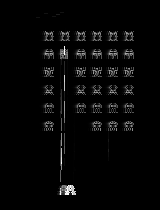

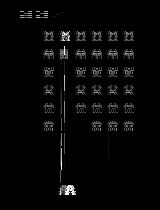

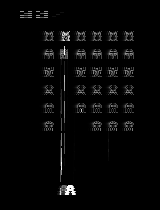

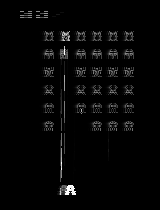

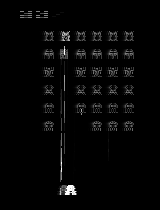

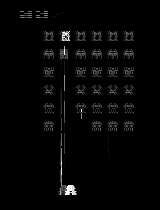

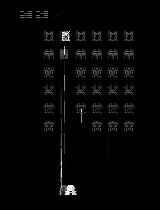

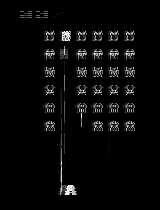

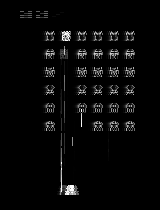

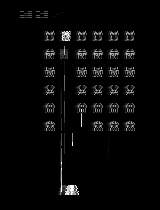

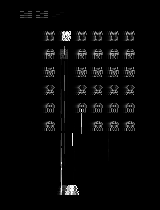

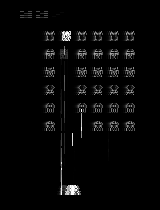

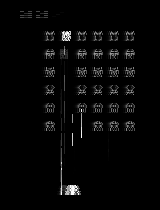

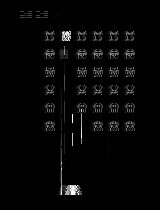

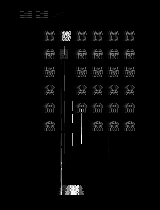

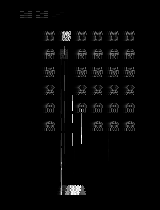

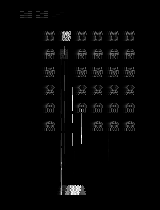

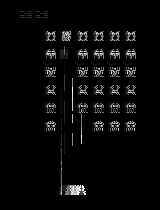

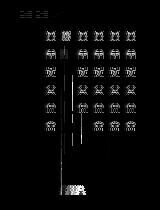

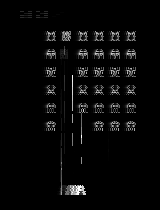

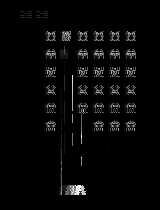

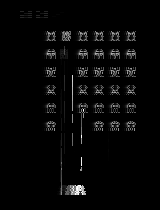

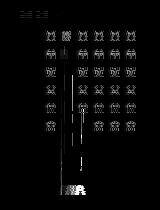

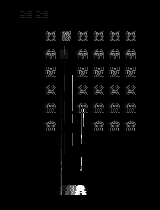

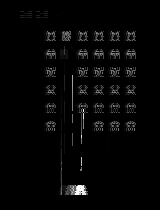

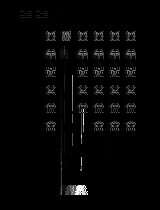

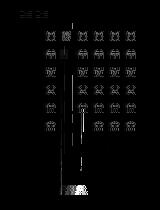

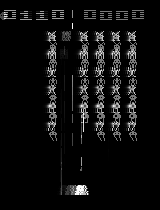

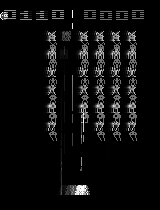

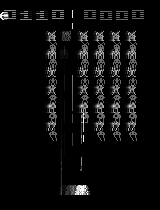

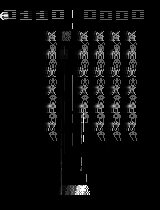

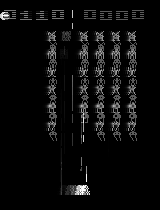

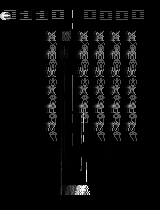

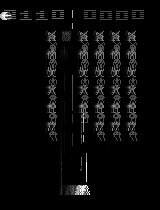

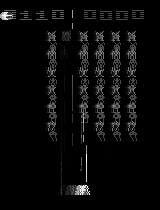

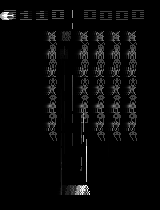

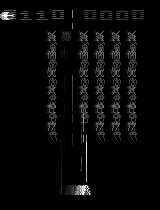

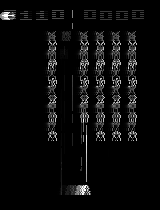

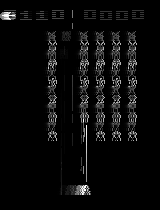

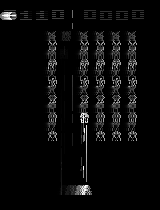

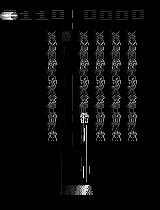

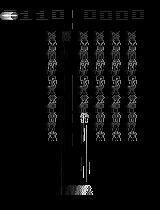

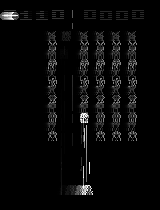

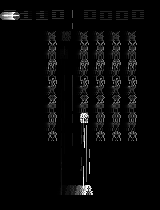

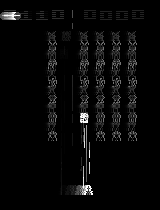

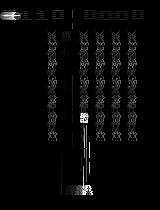

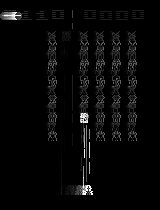

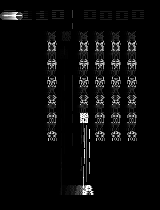

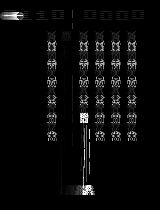

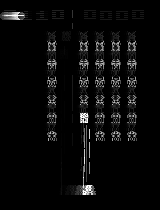

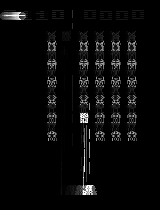

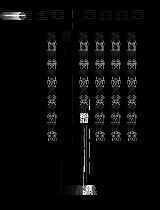

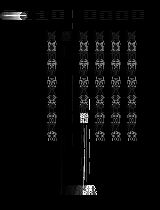

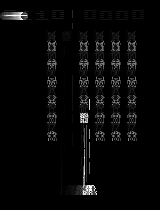

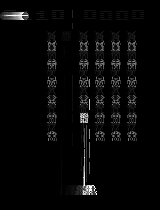

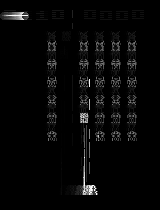

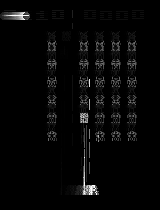

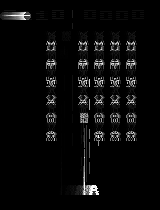

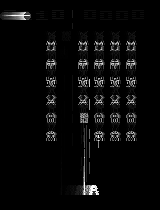

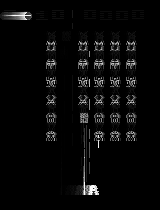

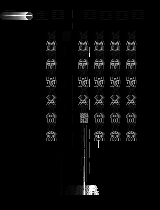

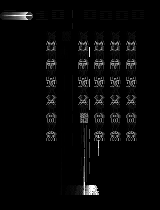

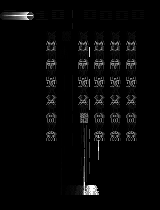

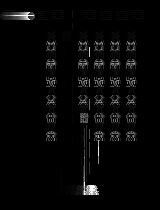

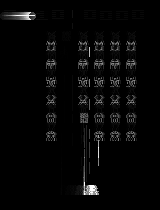

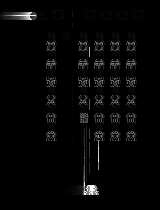

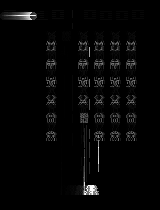

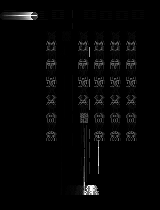

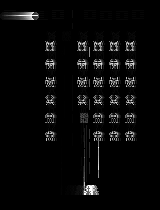

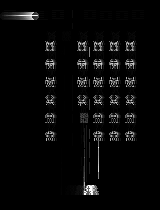

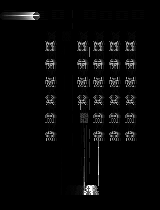

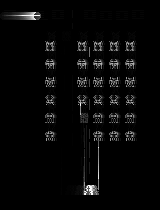

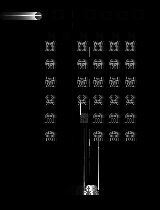

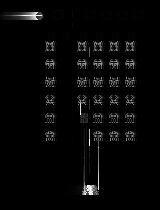

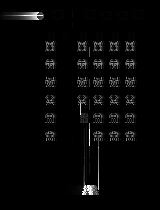

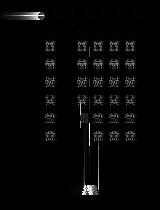

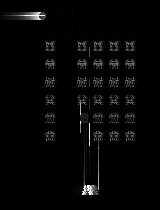

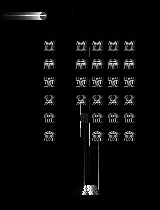

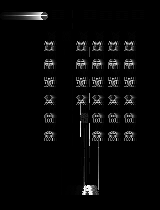

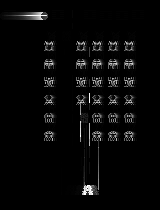

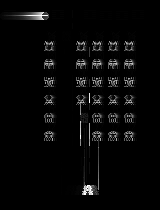

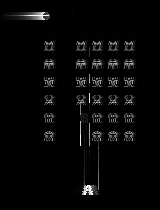

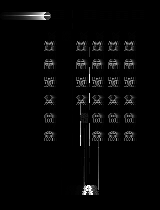

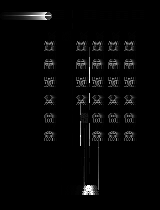

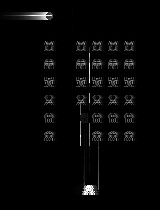

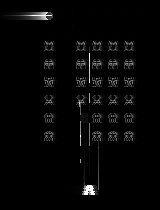

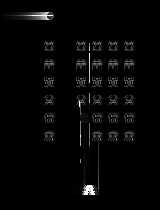

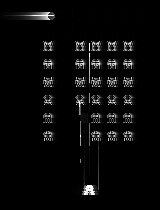

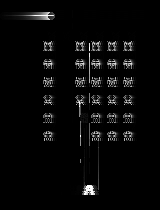

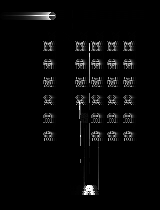

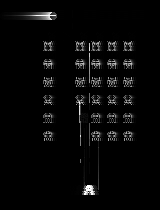

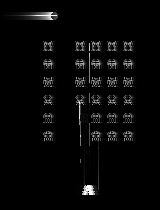

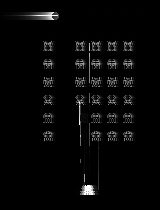

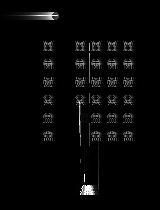

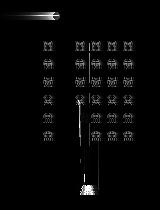

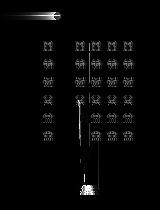

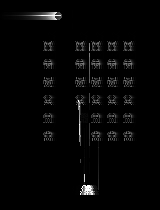

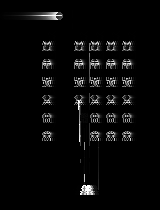

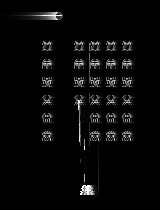

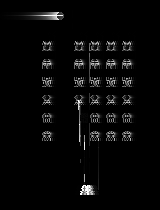

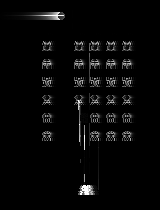

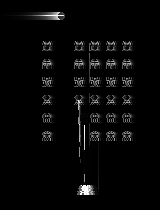

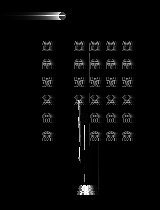

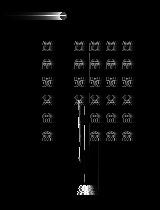

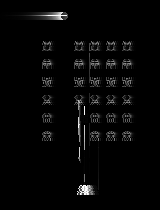

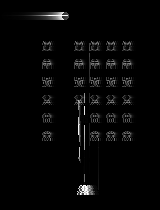

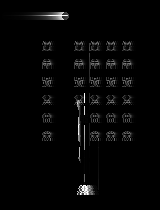

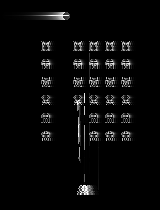

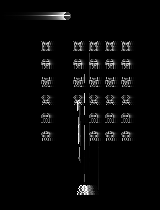

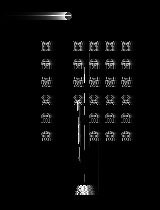

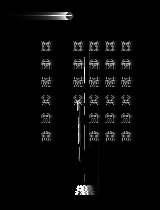

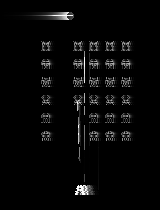

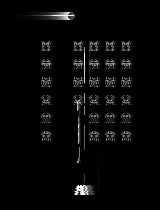

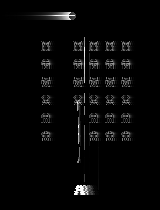

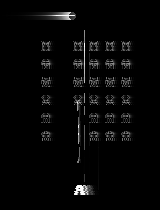

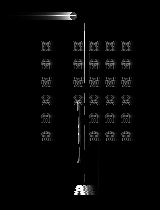

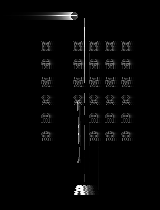

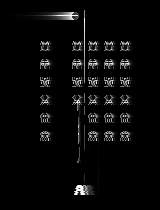

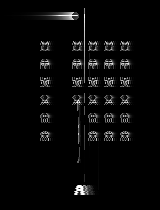

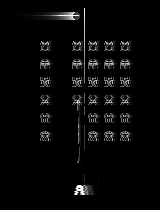

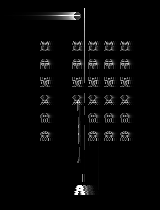

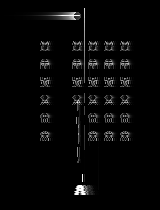

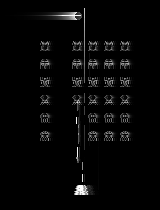

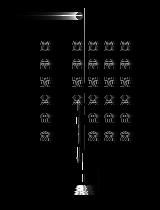

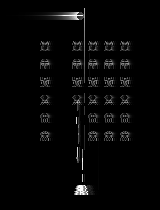

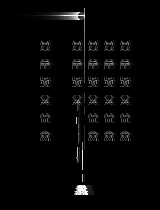

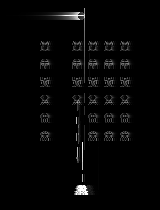

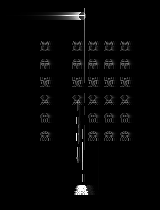

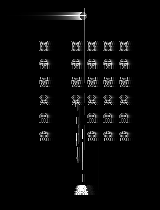

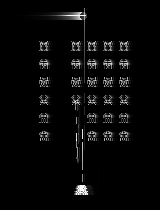

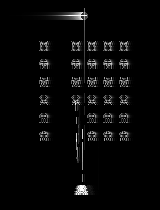

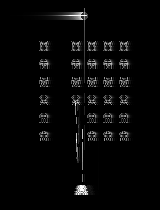

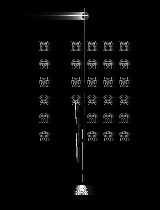

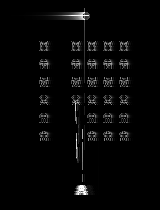

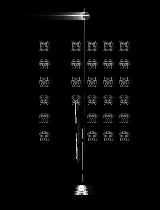

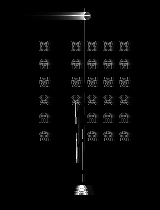

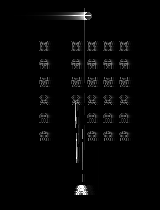

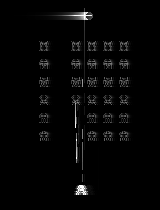

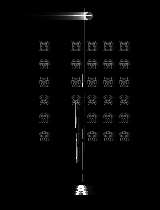

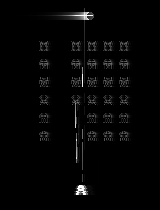

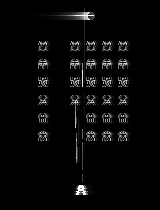

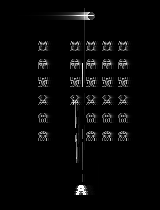

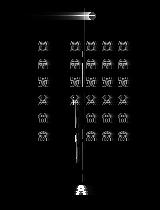

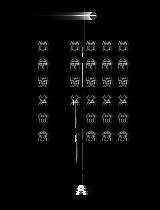

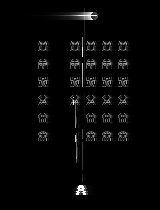

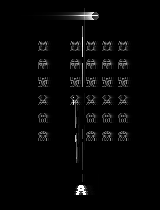

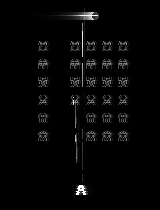

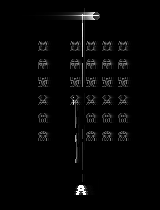

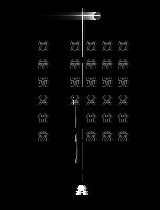

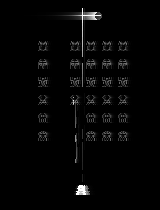

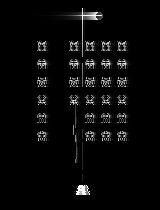

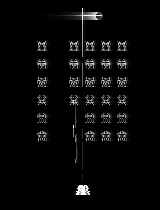

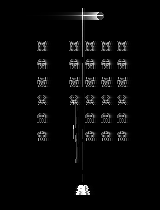

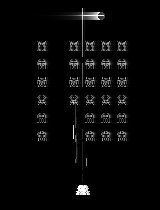

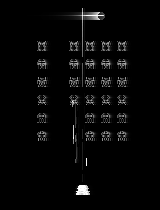

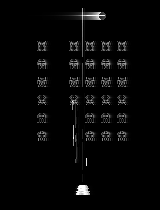

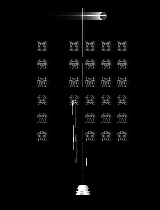

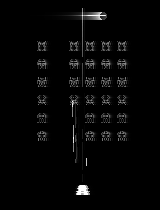

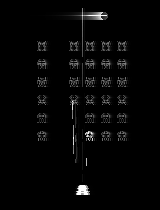

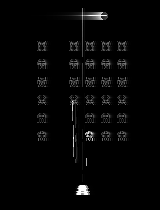

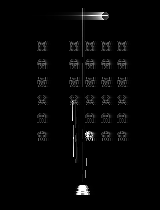

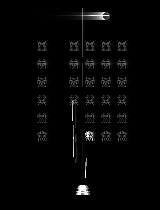

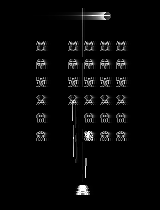

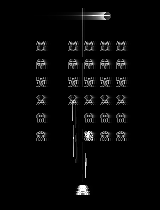

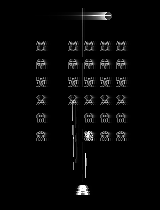

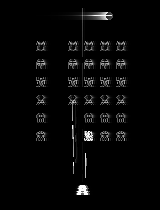

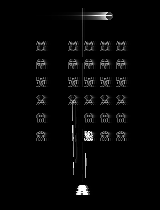

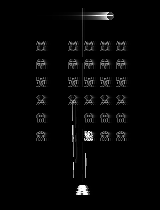

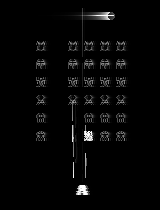

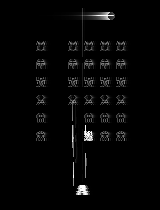

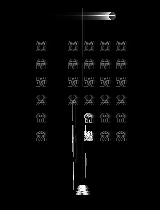

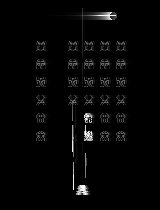

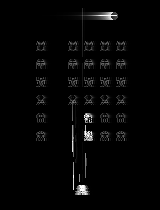

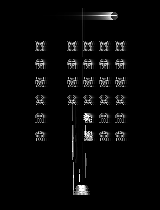

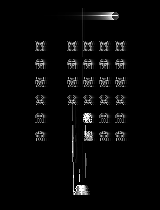

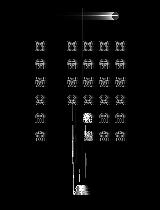

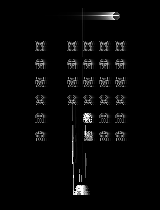

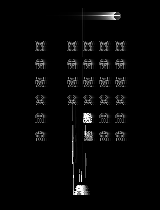

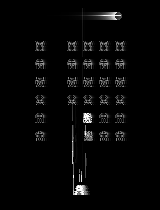

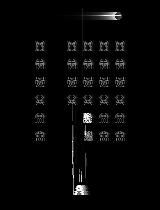

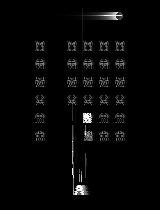

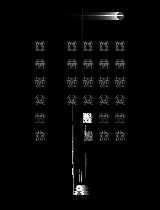

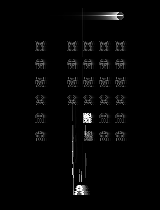

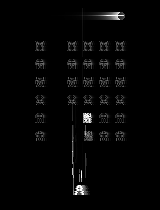

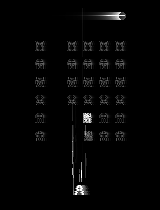

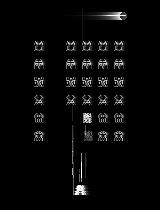

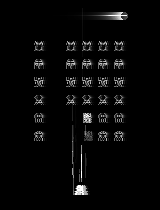

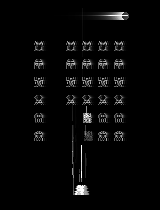

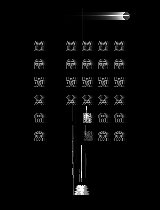

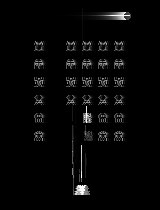

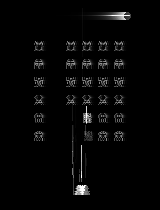

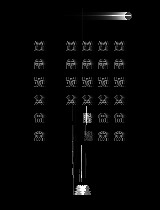

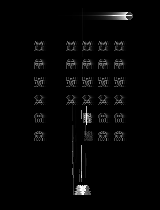

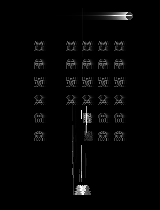

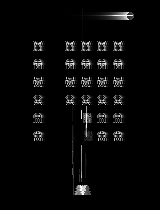

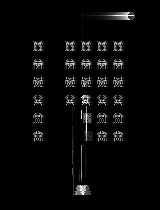

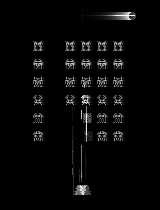

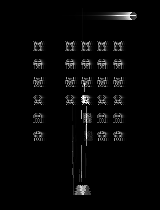

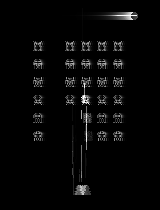

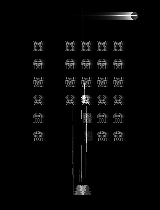

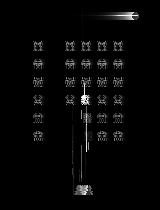

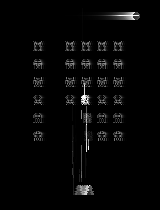

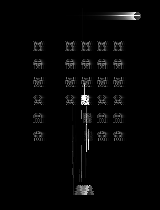

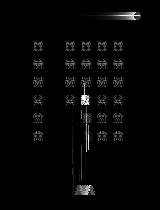

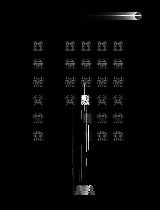

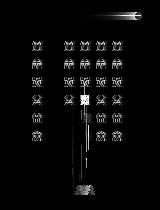

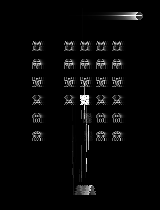

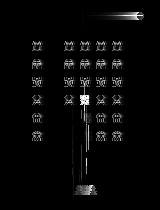

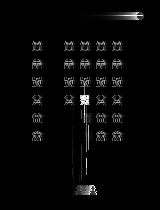

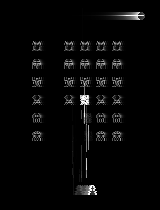

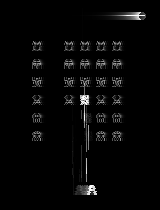

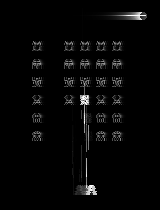

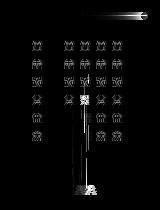

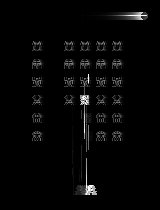

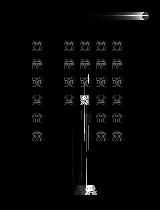

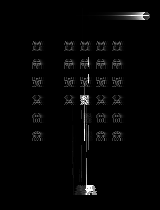

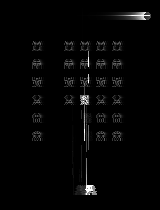

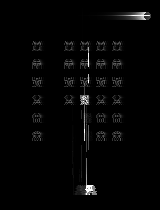

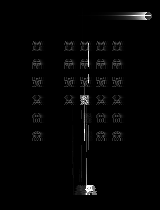

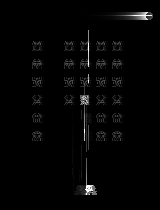

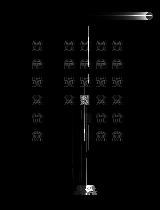

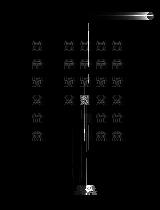

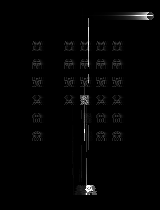

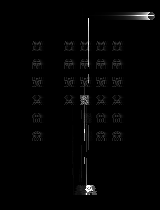

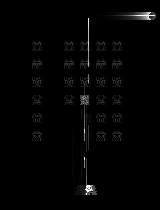

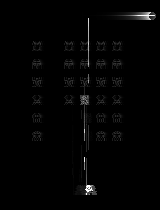

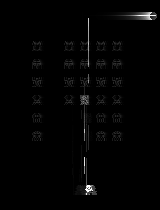

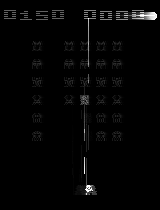

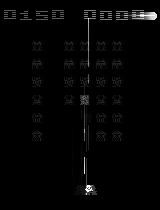

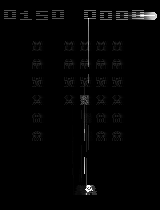

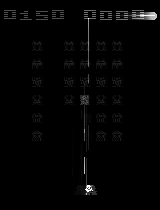

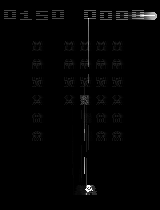

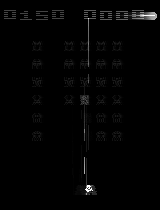

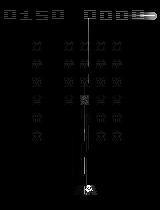

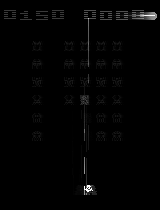

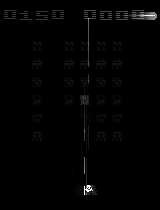

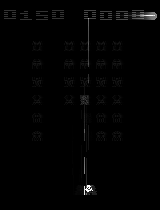

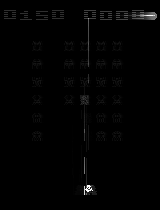

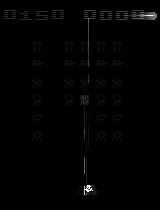

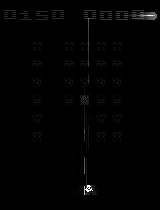

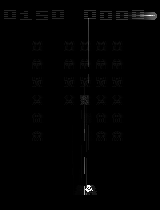

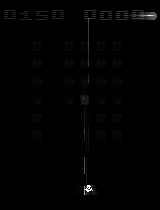

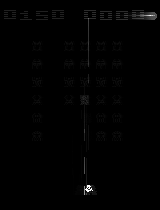

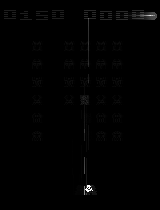

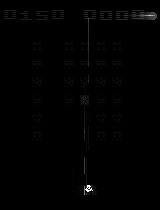

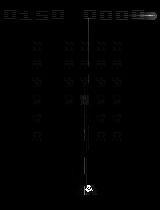

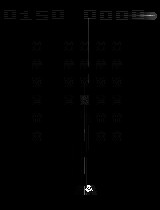

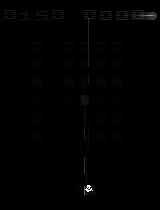

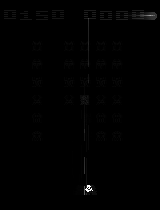

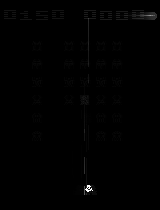

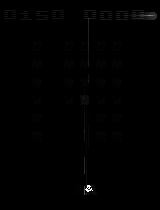

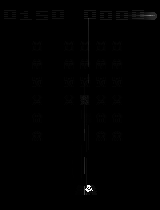

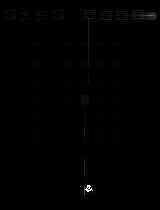

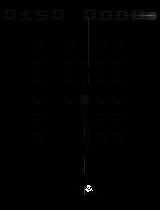

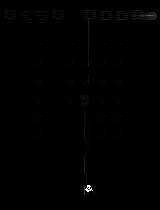

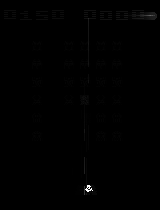

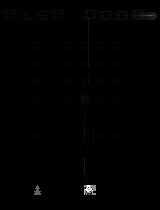

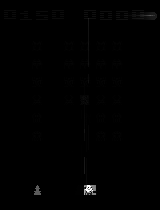

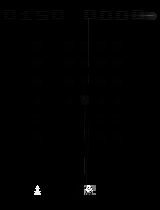

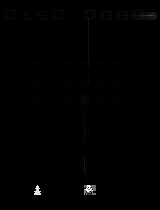

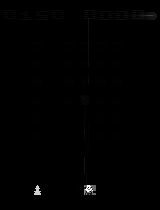

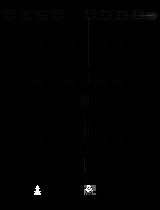

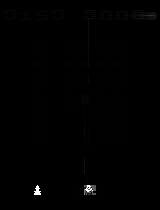

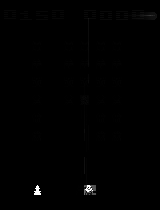

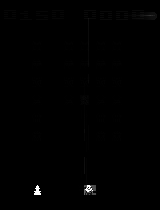

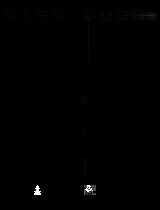

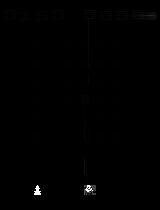

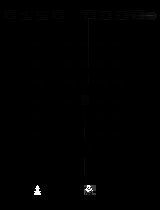

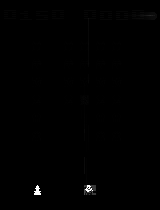

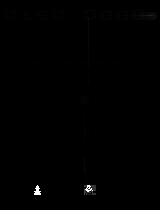

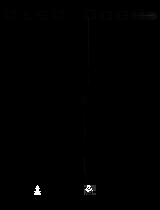

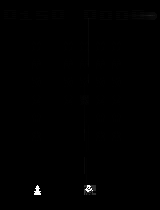

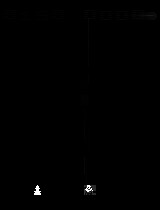

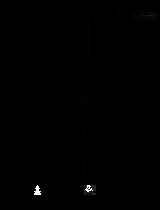

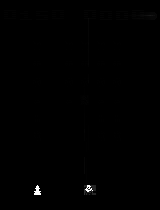

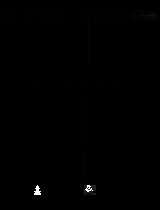

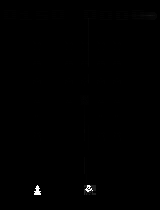

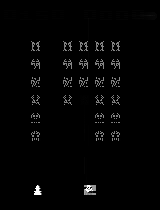

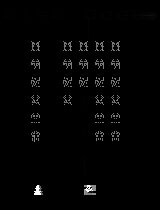

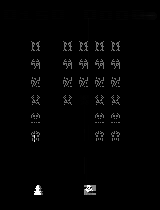

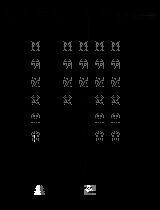

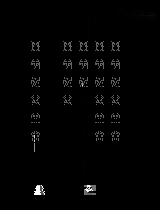

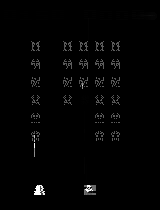

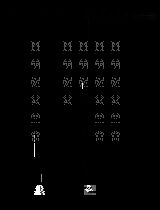

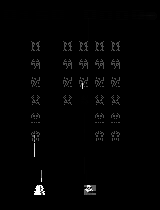

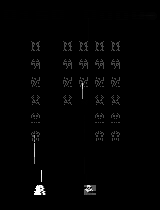

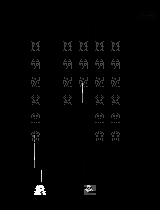

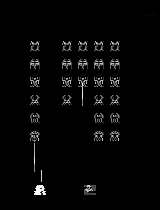

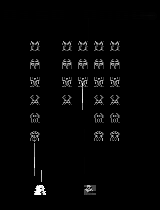

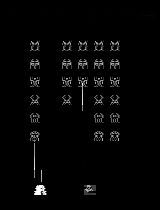

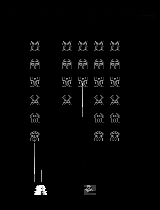

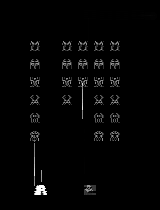

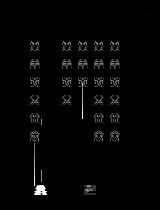

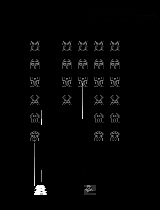

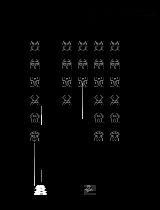

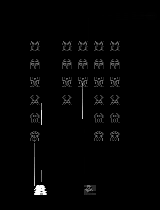

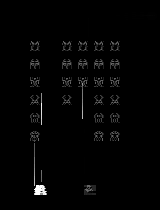

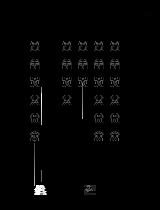

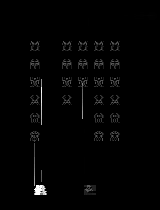

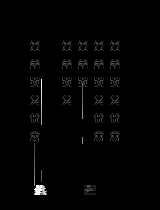

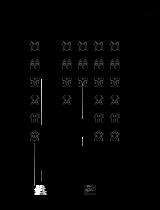

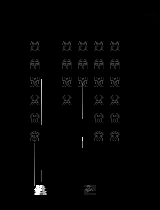

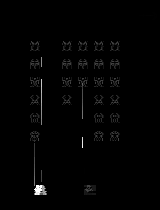

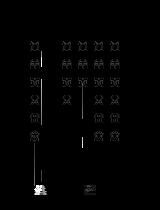

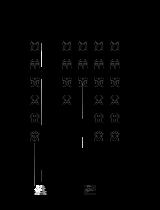

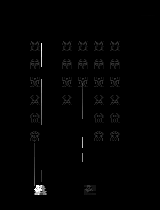

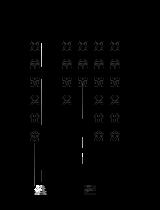

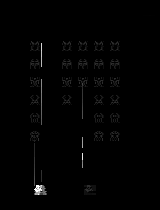

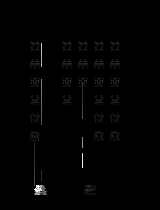

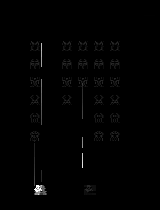

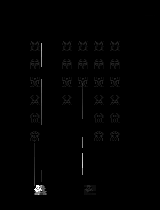

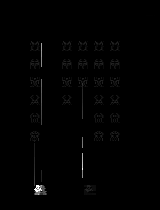

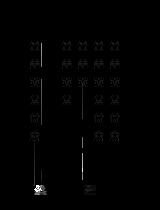

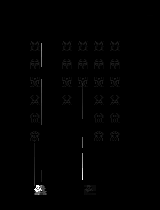

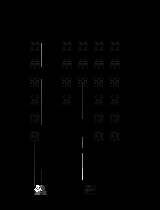

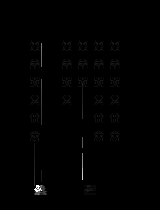

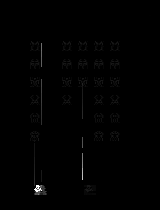

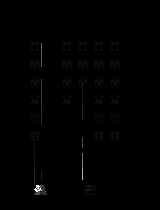

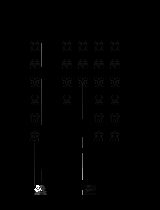

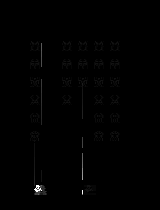

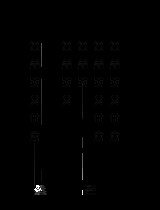

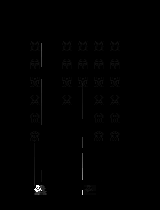

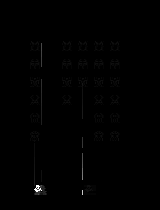

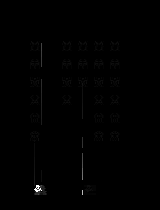

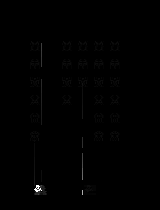

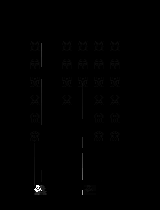

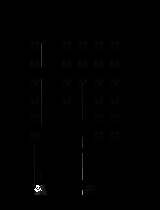

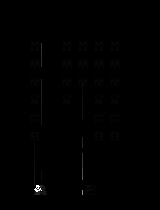

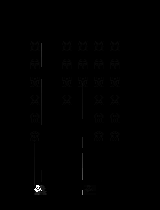

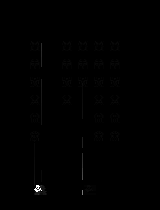

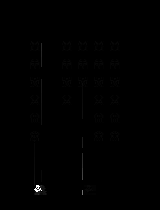

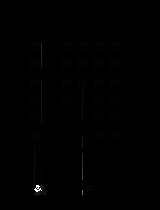

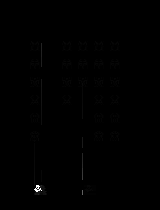

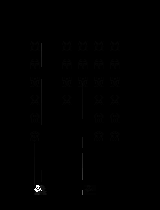

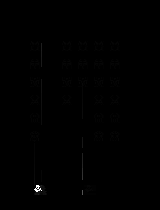

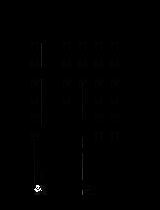

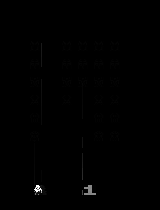

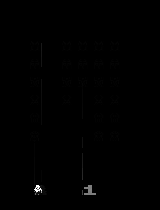

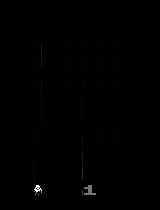

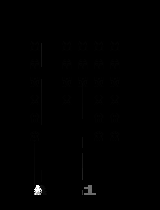

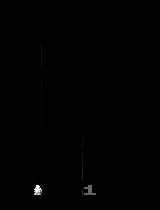

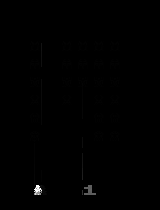

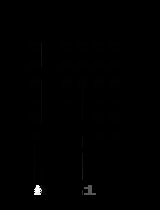

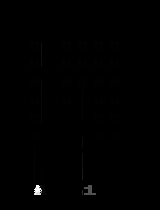

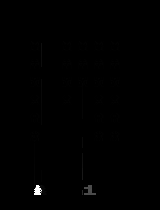

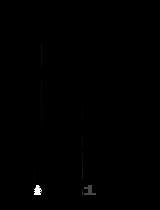

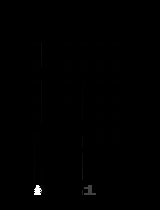

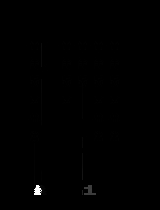

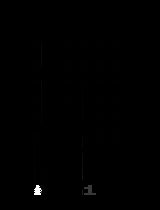

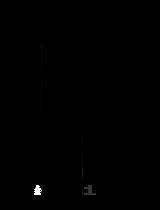

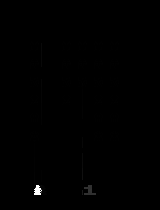

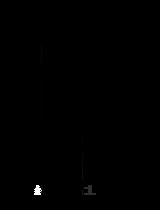

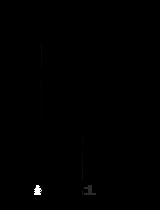

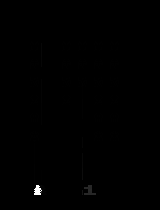

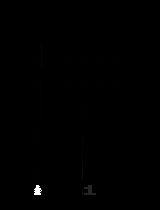

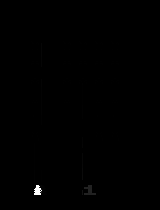

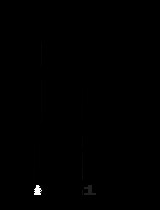

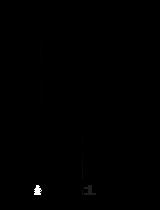

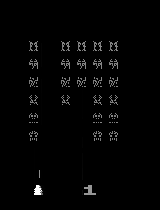

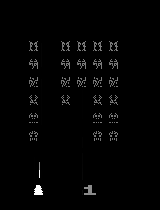

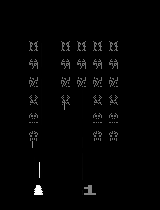

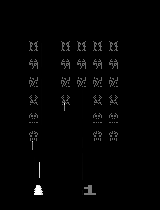

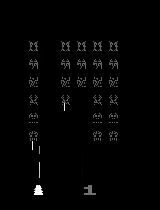

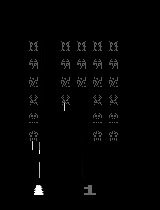

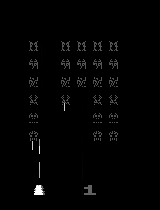

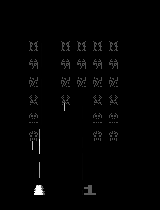

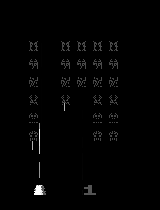

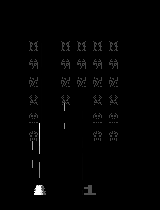

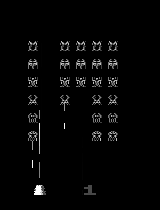

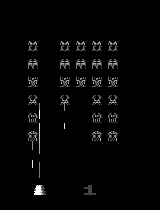

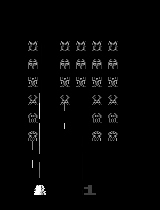

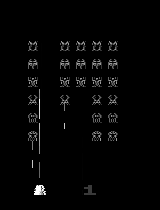

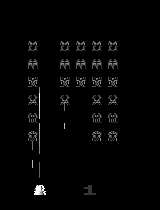

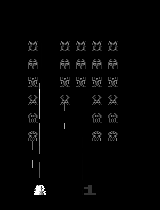

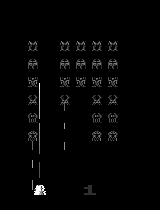

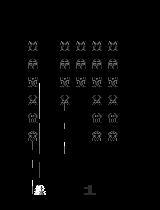

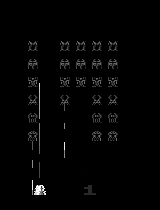

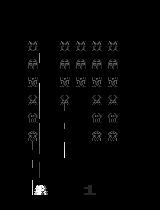

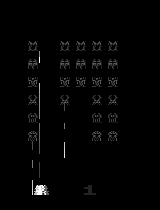

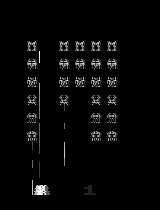

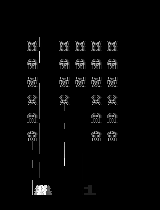

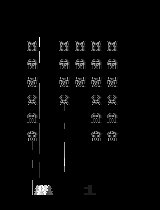

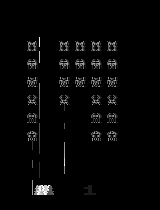

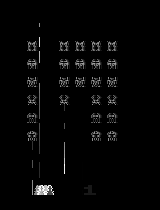

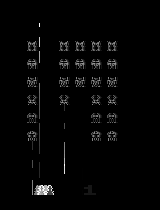

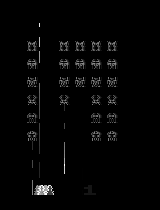

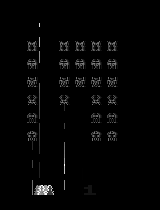

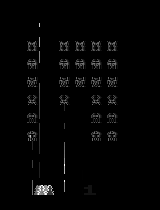

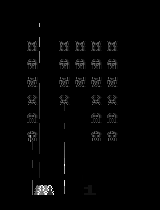

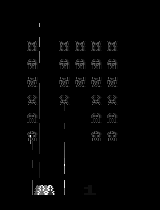

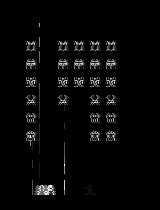

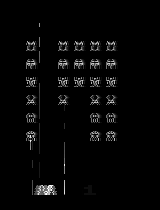

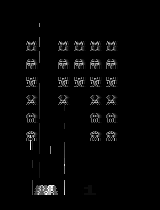

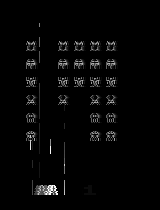

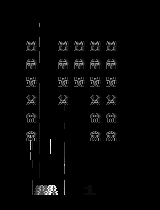

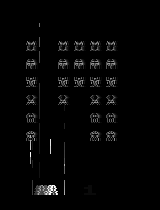

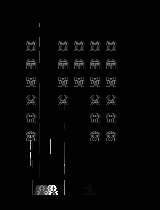

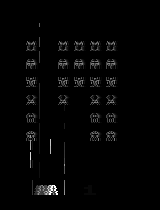

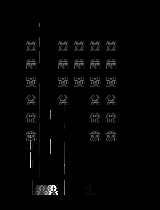

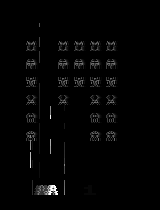

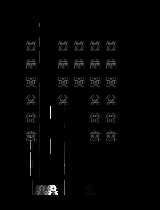

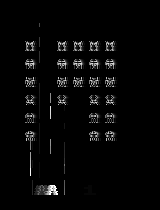

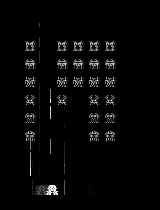

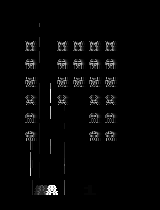

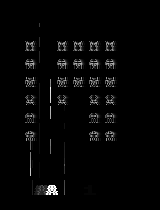

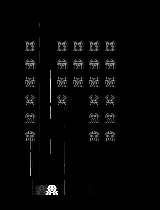

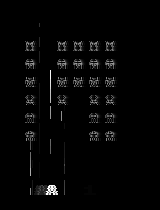

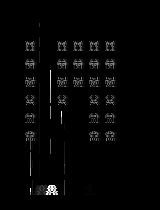

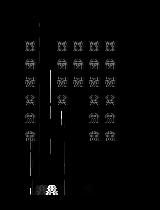

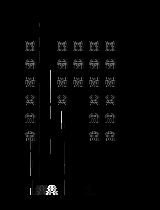

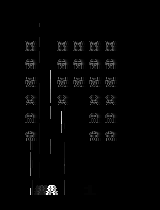

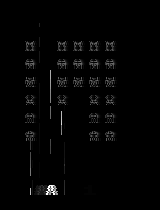

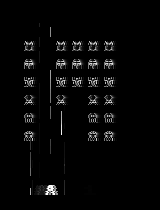

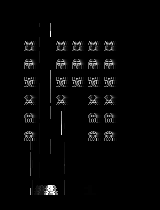

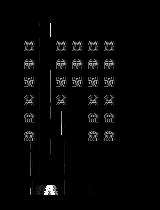

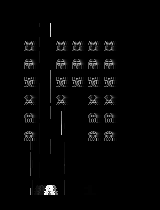

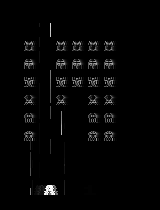

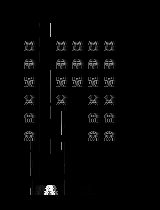

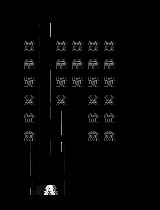

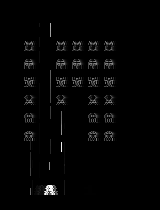

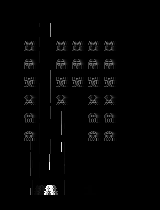

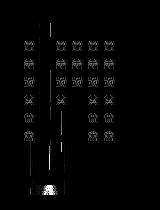

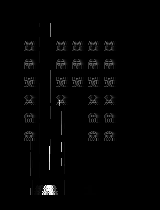

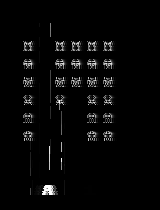

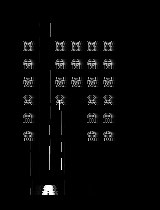

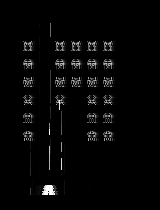

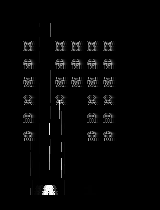

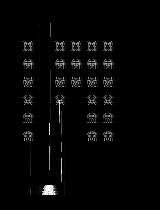

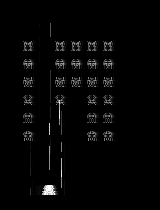

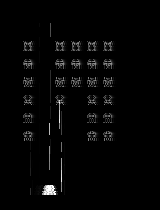

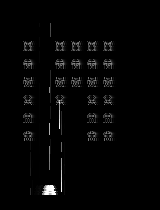

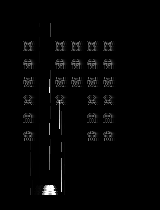

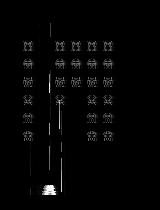

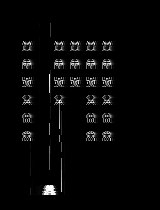

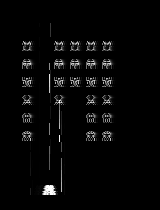

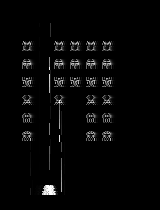

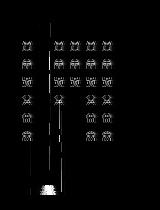

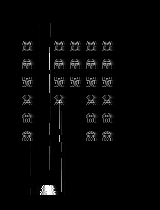

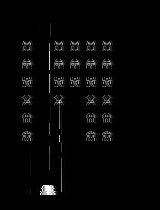

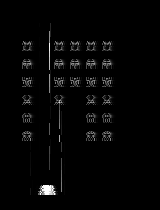

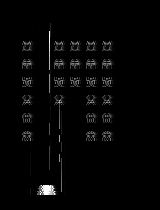

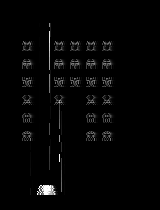

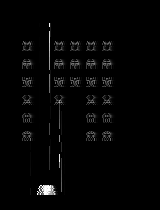

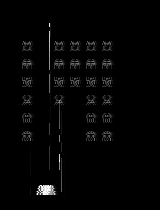

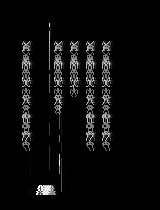

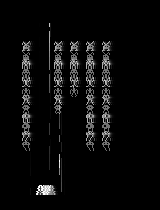

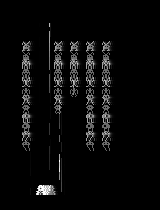

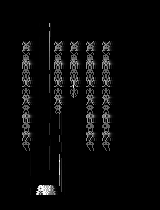

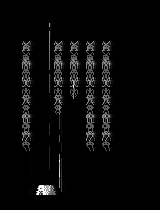

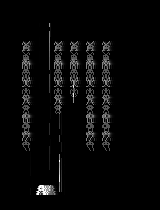

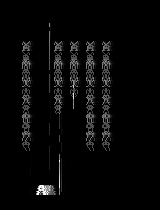

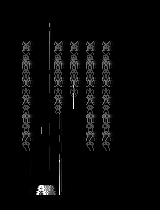

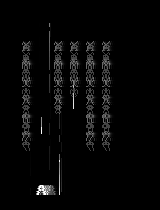

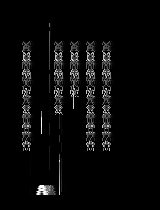

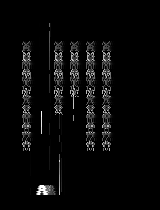

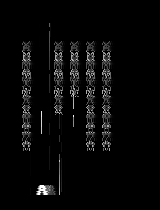

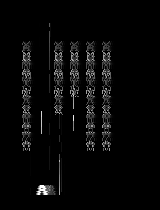

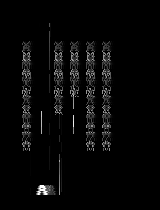

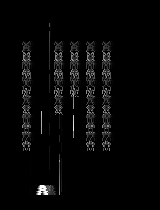

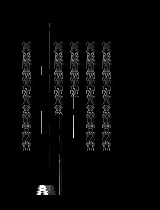

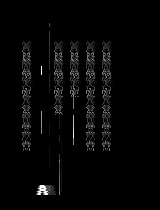

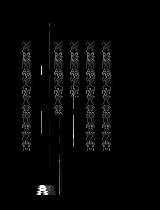

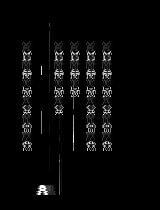

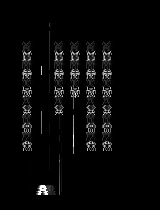

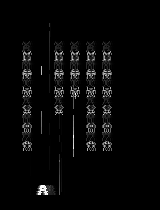

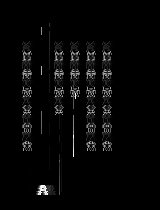

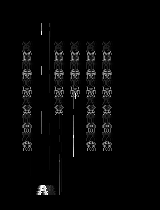

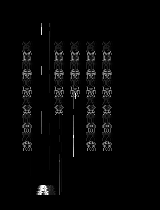

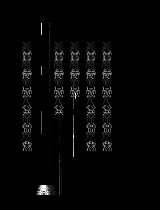

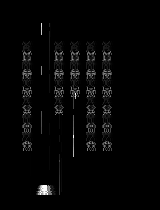

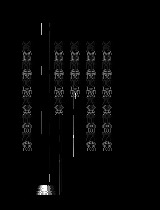

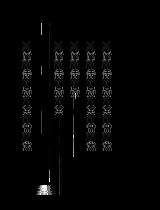

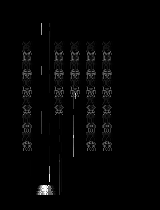

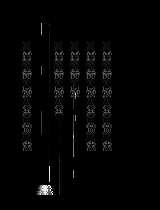

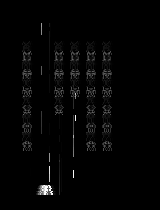

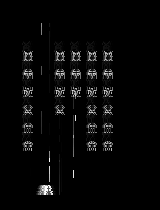

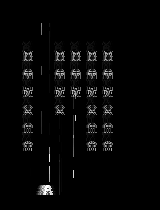

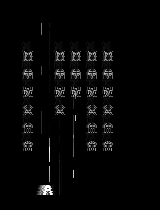

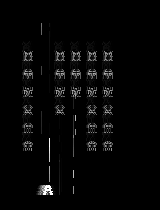

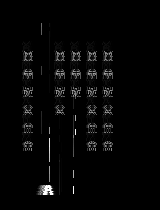

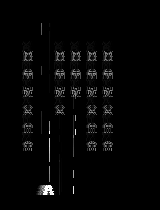

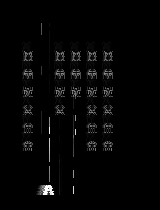

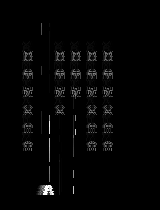

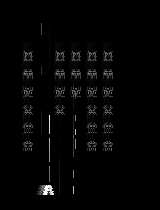

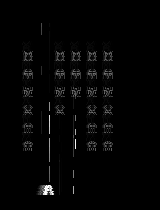

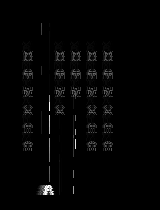

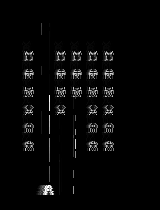

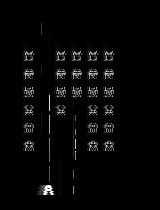

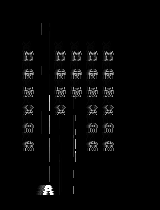

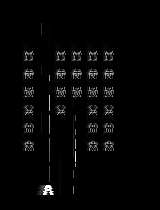

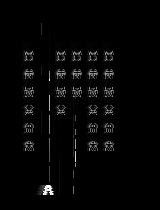

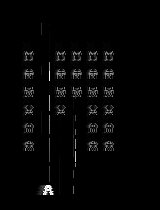

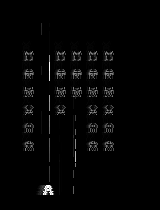

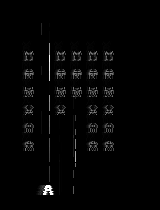

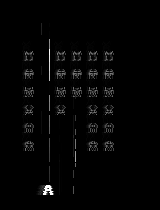

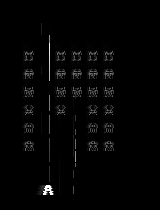

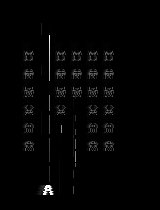

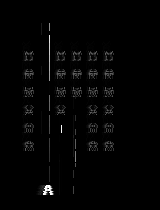

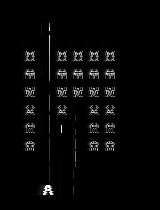

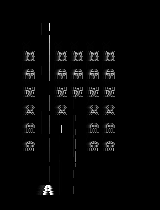

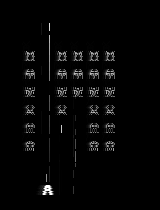

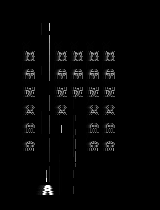

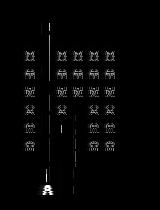

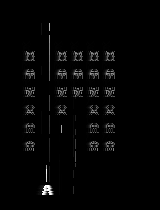

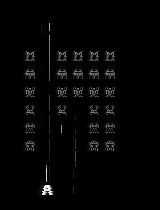

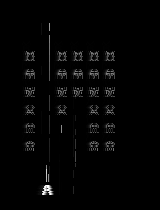

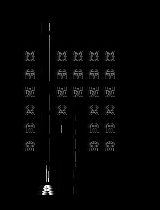

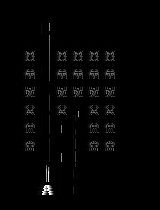

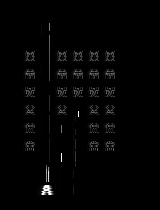

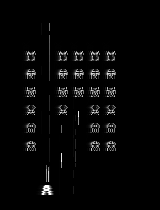

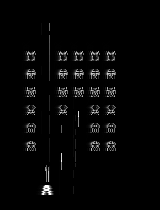

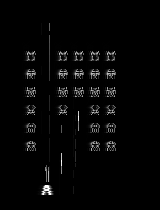

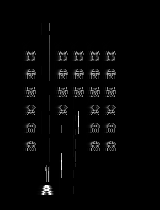

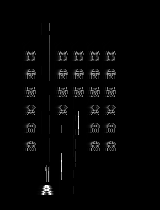

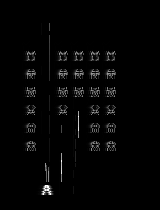

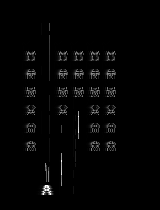

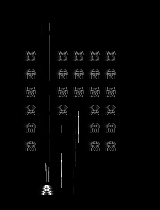

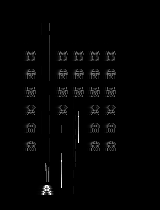

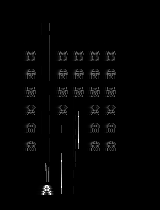

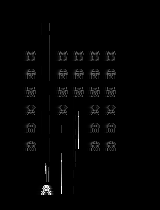

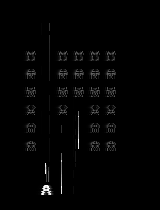

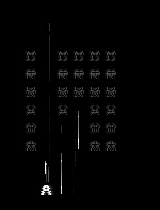

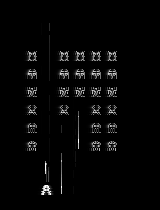

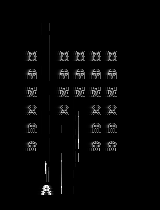

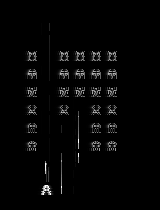

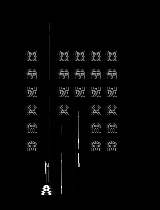

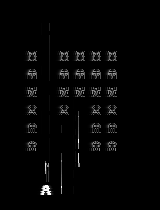

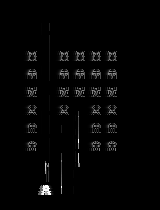

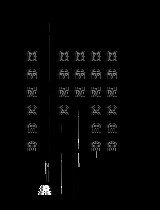

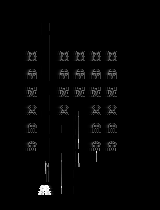

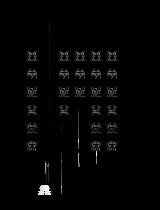

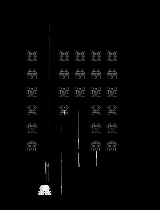

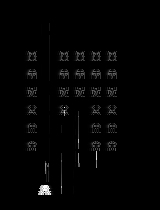

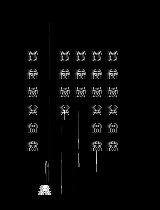

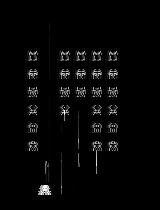

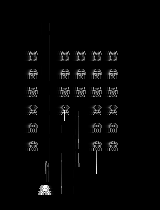

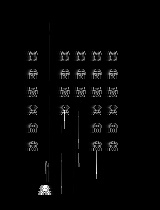

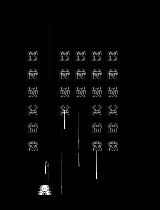

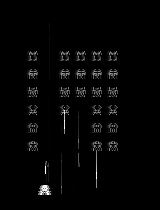

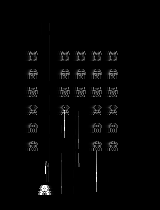

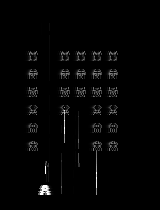

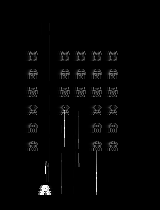

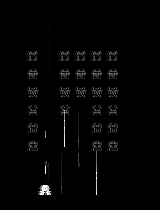

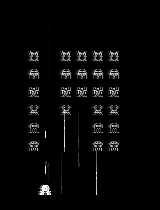

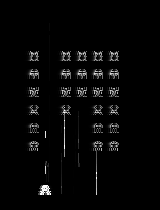

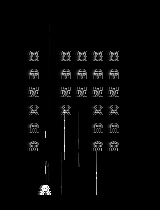

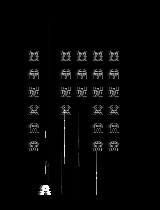

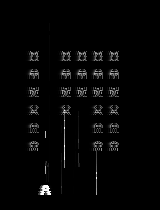

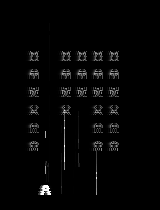

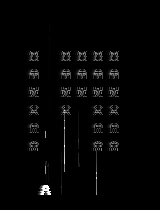

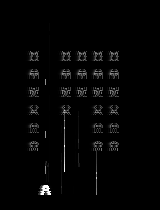

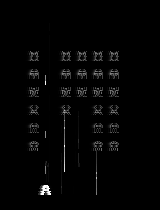

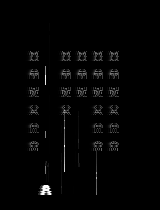

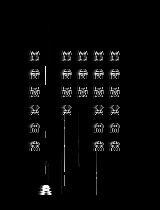

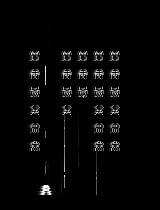

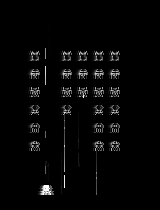

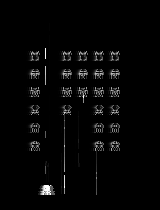

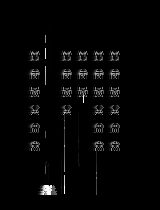

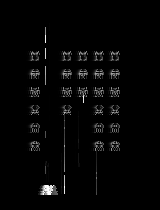

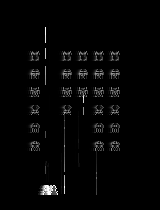

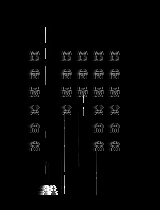

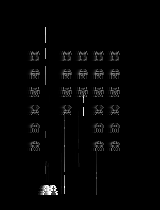

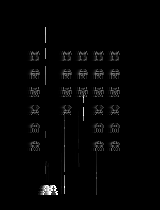

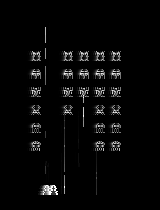

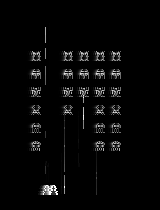

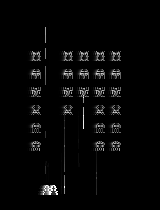

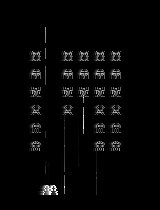

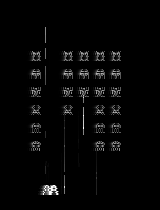

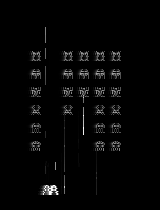

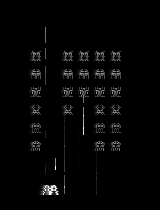

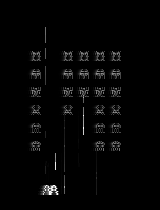

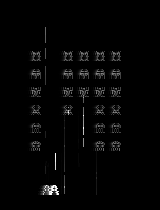

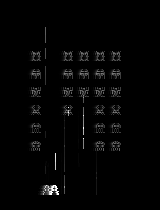

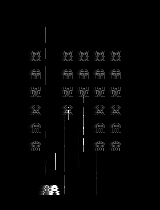

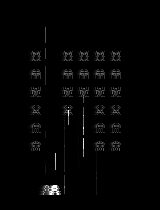

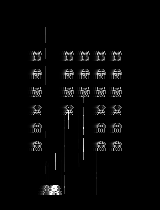

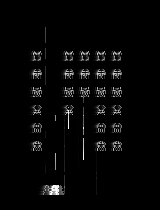

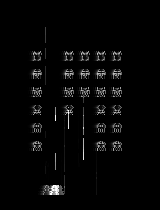

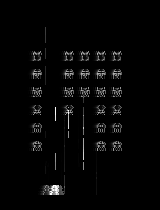

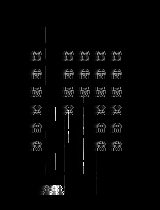

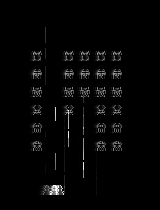

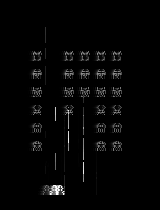

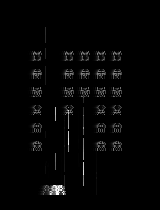

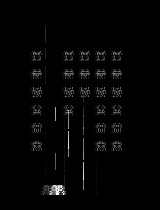

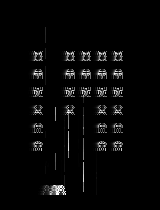

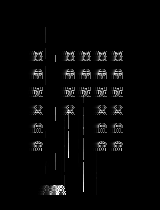

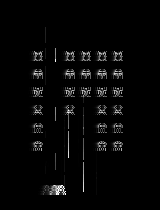

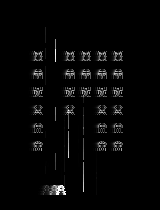

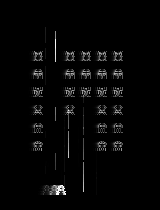

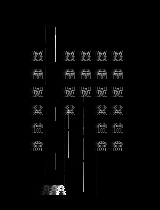

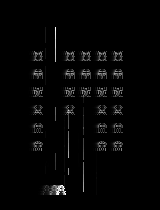

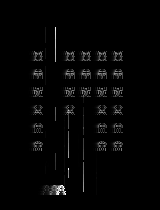

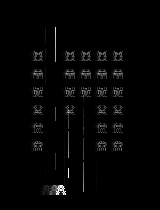

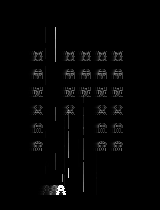

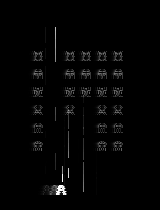

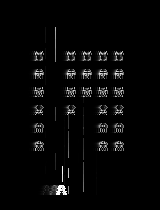

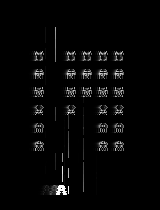

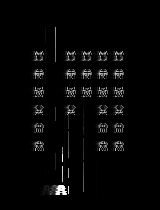

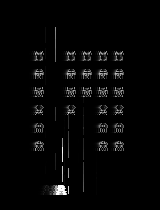

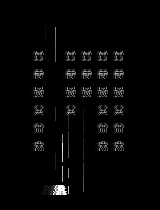

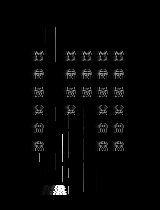

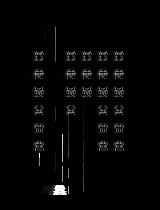

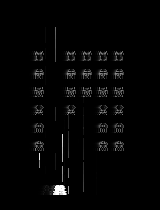

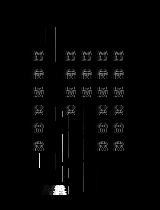

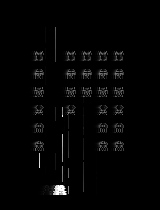

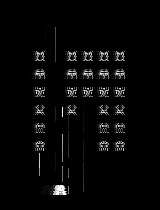

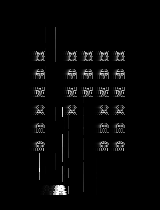

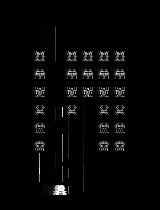

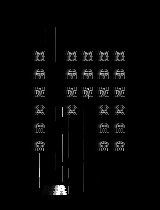

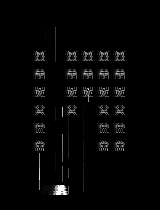

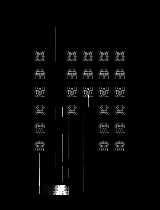

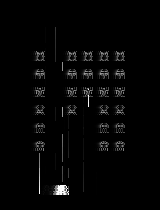

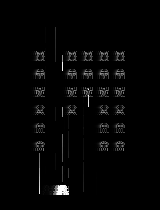

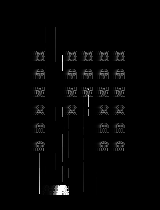

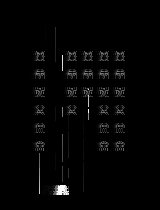

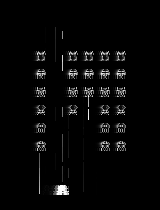

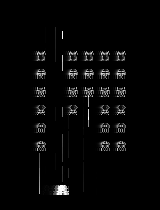

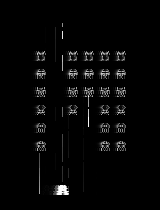

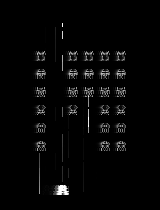

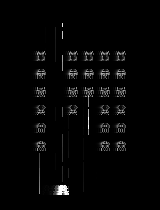

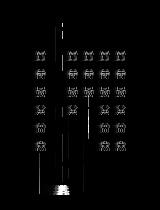

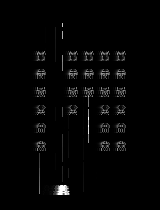

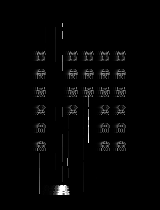

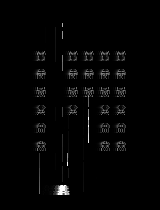

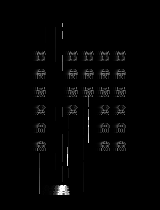

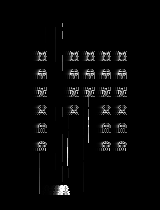

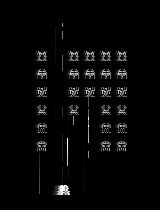

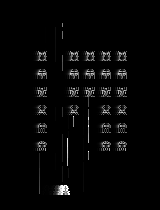

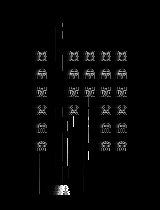

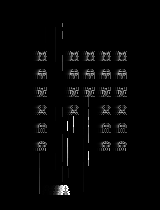

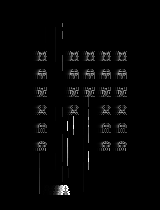

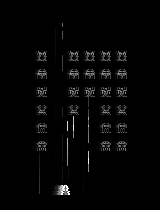

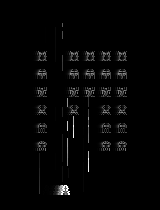

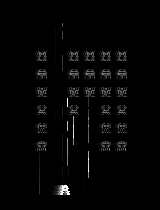

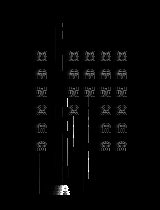

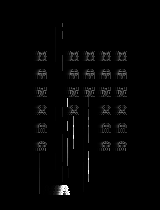

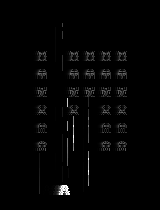

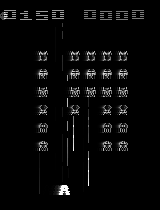

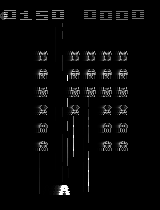

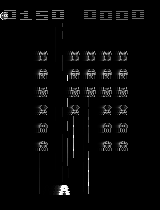

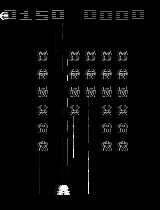

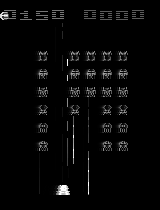

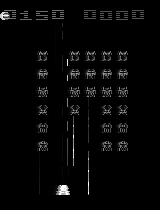

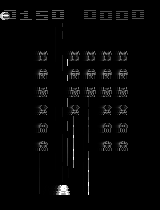

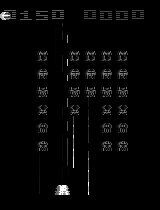

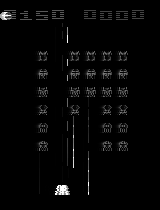

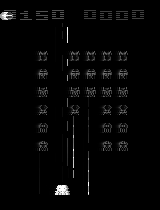

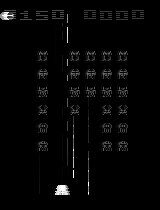

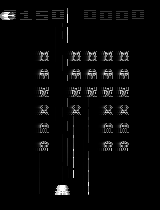

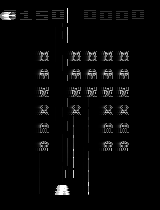

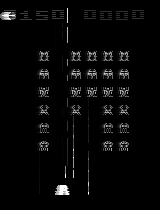

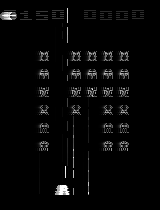

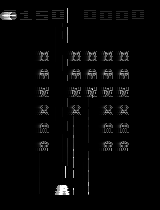

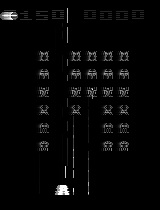

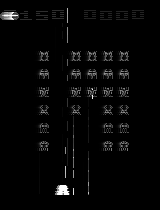

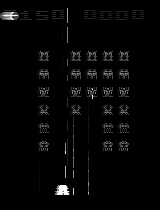

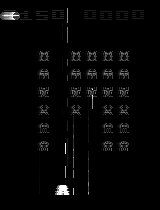

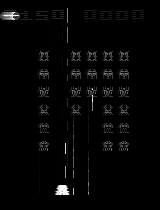

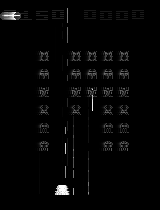

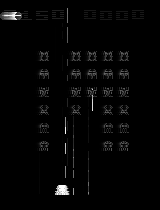

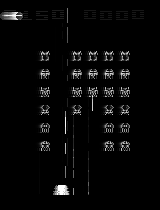

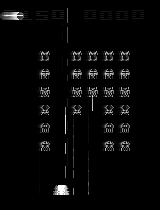

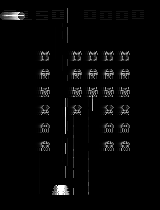

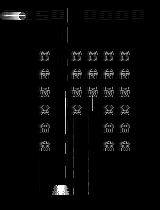

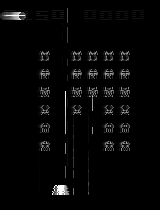

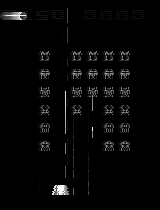

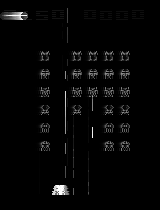

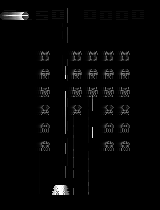

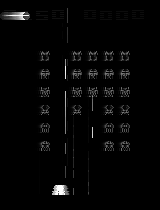

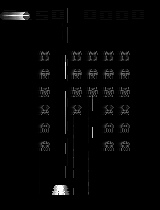

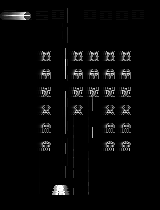

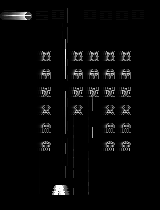

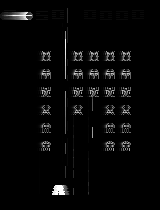

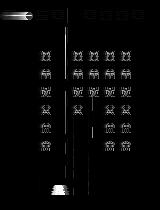

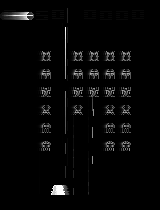

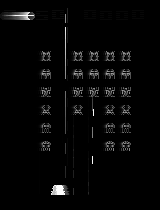

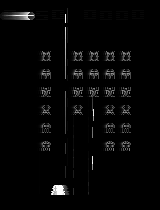

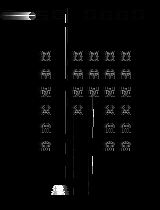

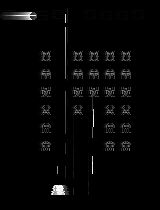

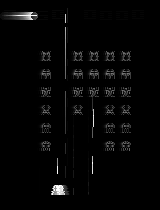

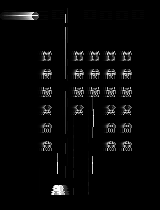

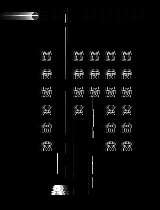

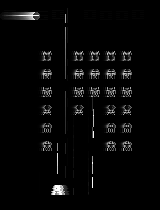

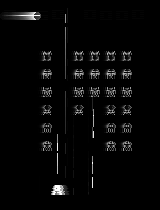

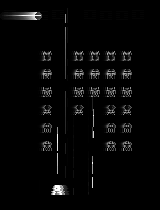

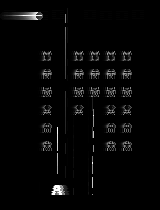

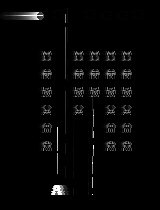

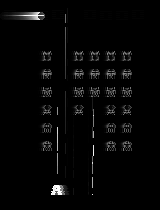

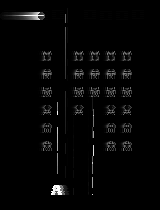

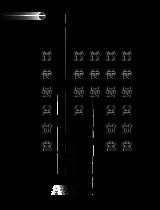

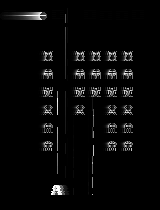

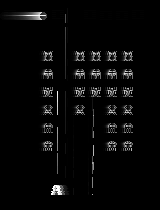

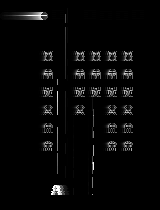

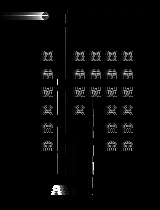

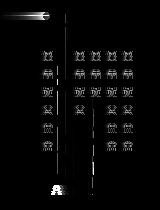

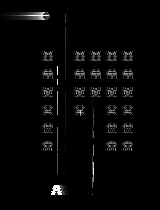

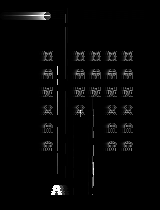

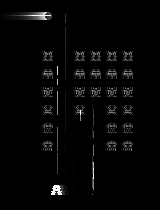

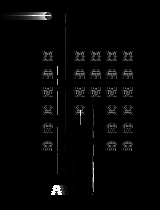

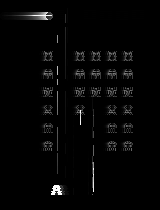

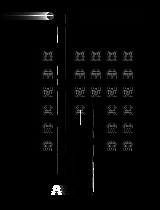

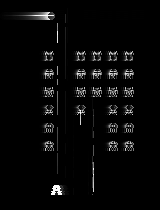

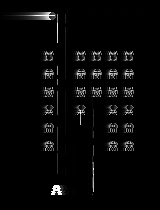

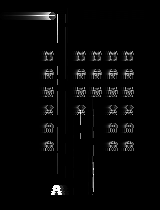

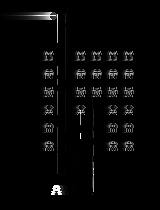

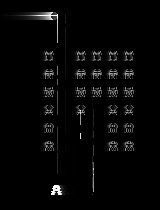

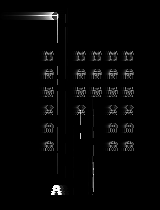

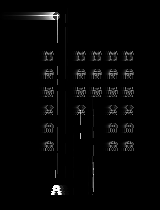

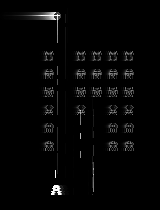

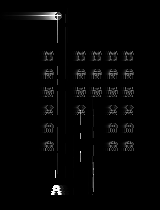

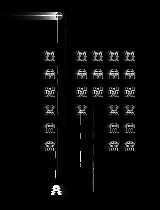

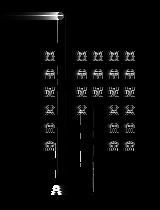

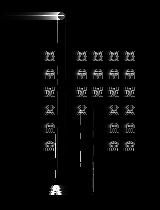

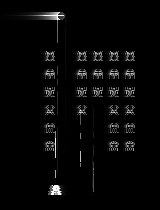

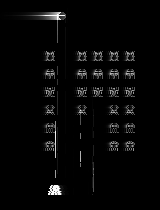

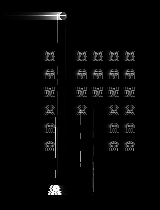

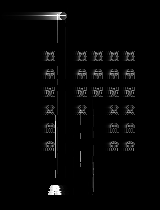

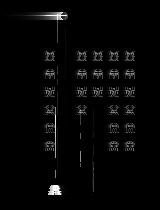

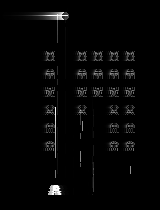

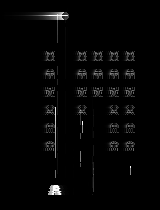

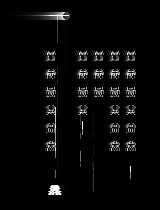

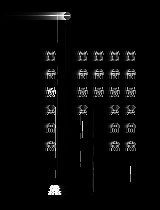

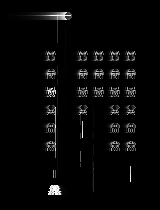

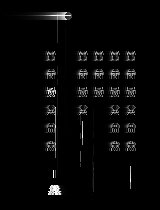

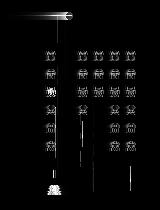

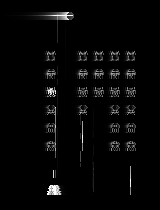

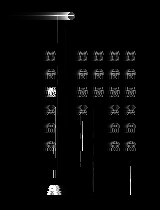

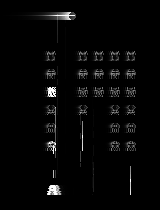

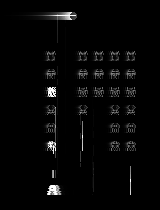

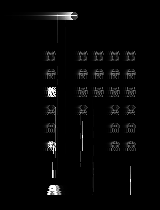

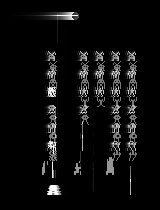

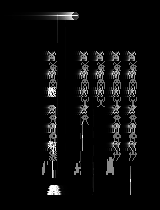

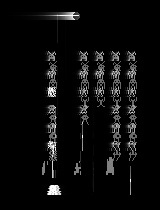

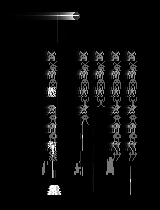

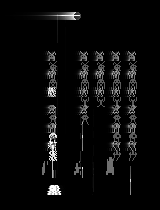

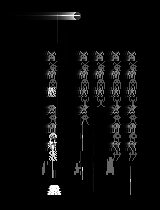

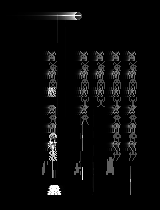

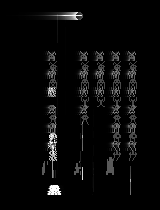

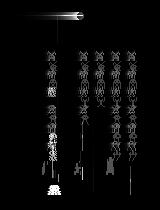

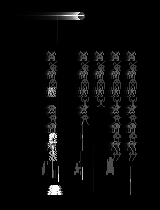

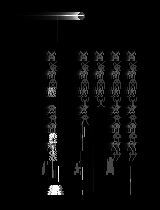

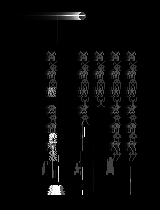

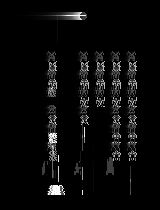

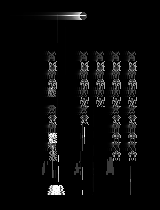

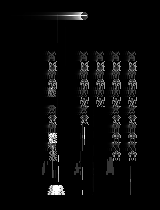

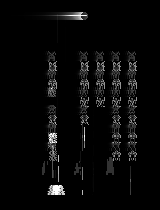

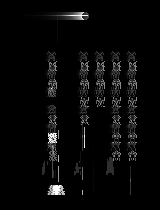

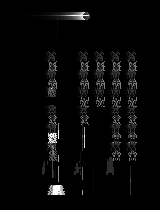

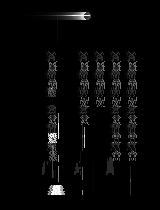

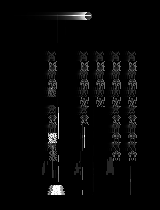

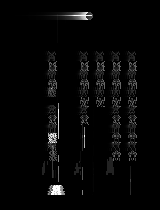

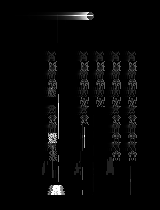

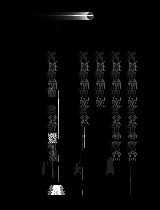

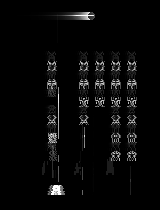

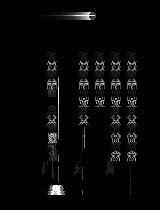

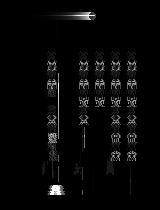

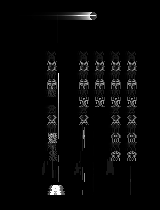

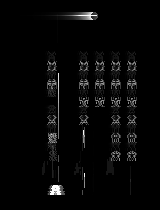

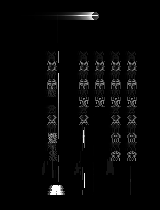

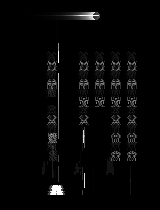

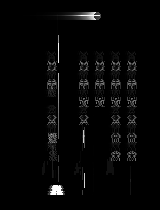

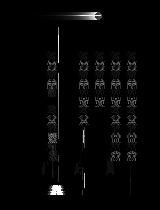

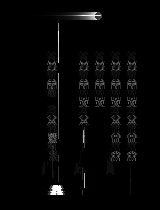

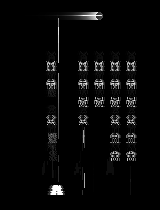

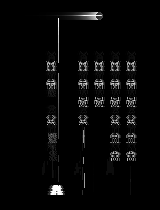

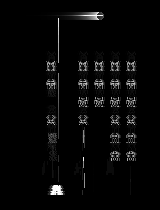

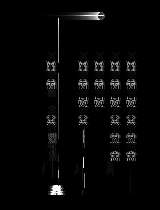

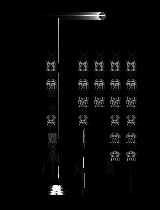

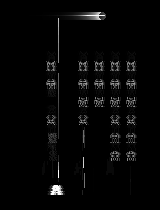

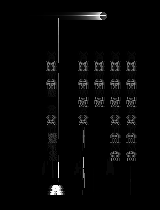

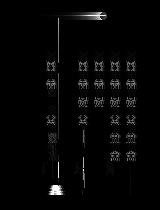

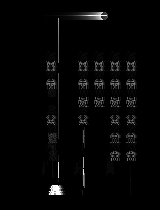

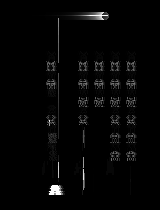

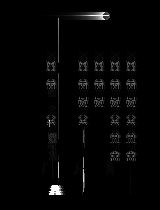

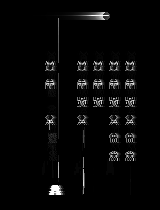

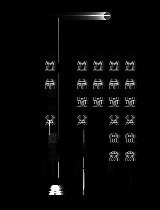

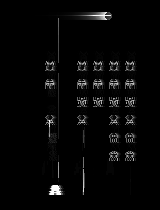

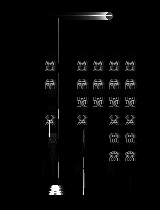

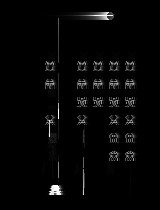

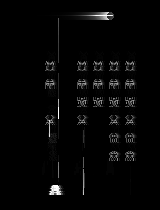

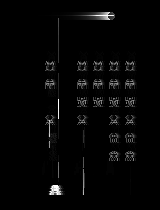

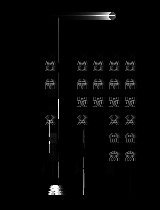

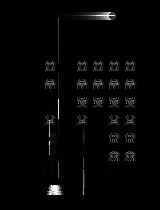

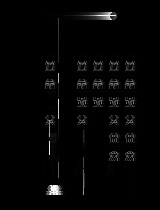

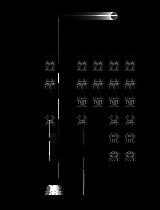

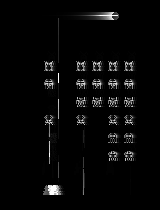

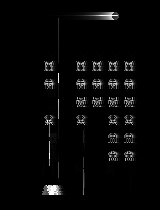

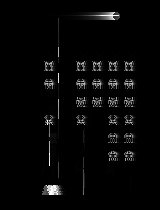

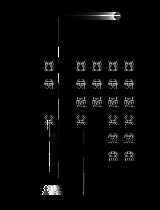

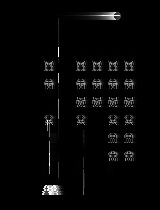

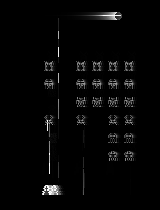

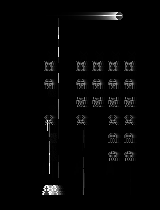

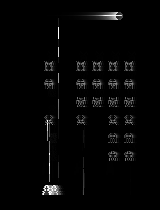

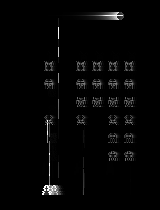

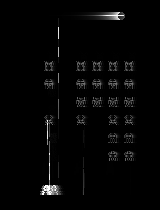

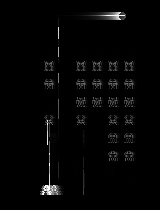

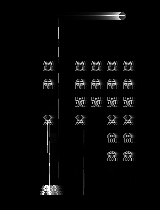

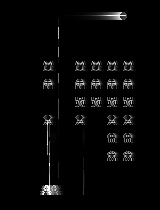

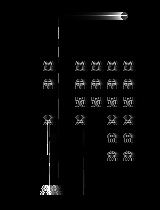

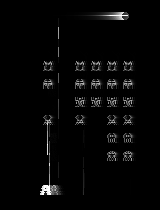

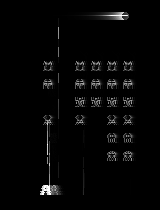

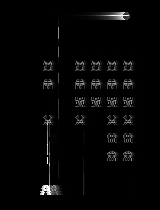

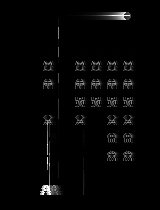

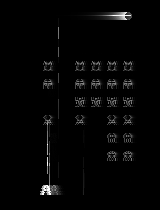

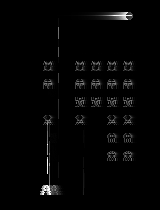

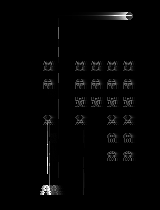

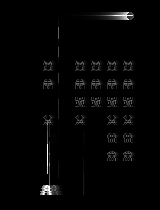

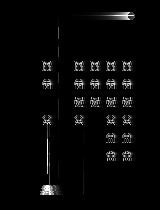

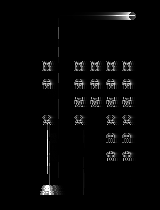

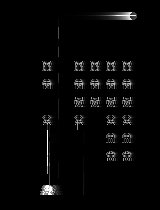

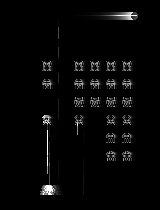

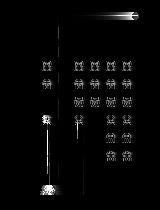

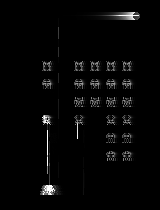

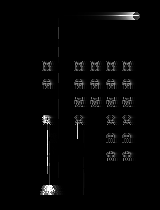

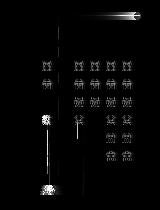

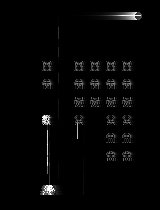

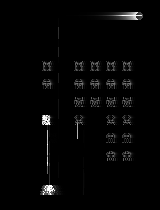

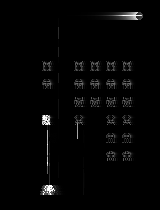

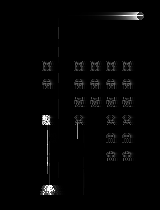

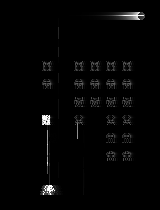

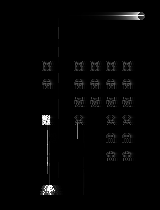

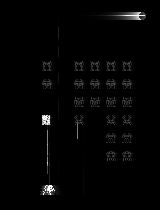

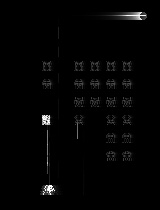

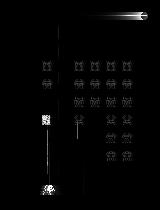

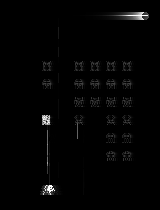

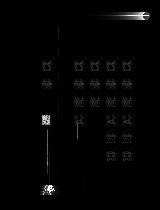

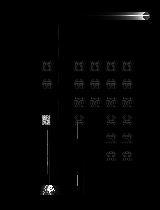

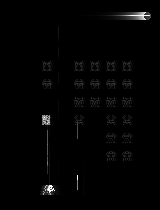

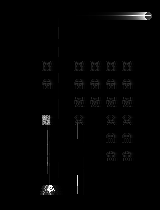

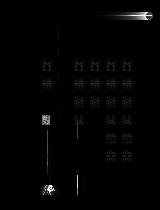

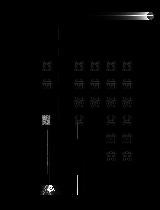

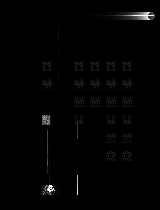

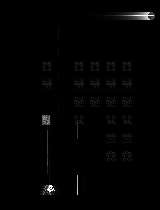

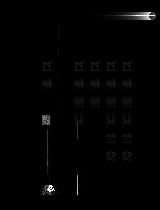

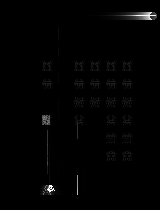

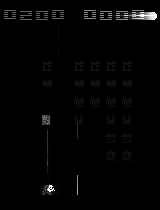

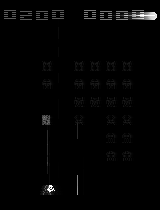

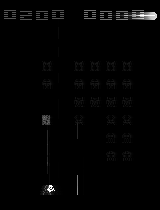

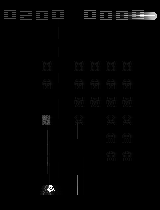

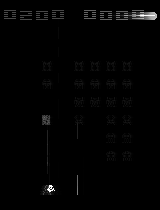

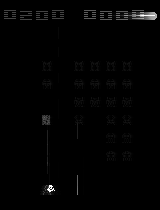

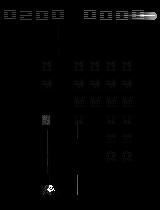

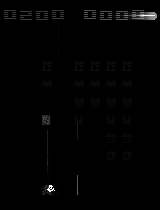

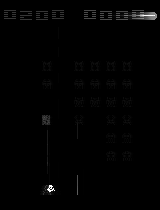

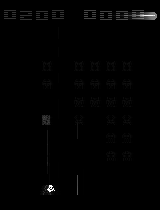

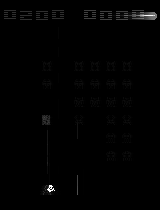

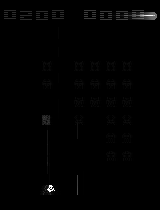

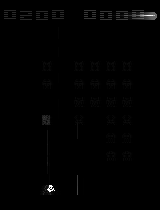

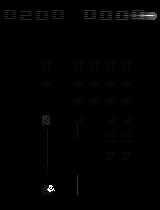

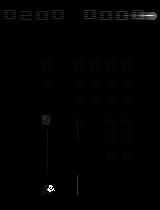

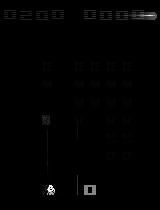

In [33]:
import gym
from gym.wrappers import Monitor
import glob
import io
import base64
from IPython.display import HTML
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
import random

display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment 
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

def randomAction(env, num_of_actions):
  return random.choice(range(num_of_actions))

env = wrap_env(gym.make("SpaceInvaders-v0"))
observation = env.reset()
last_observation = get_grayImage(observation)
acumltive_change = np.zeros((210, 160))
gamma = 0.93

while True:
  env.render()
  action = randomAction(env, env.action_space.n) 
        
  observation, reward, done, info = env.step(action)
  temp_observation =  get_grayImage(observation)
  observation_change = temp_observation - last_observation
  acumltive_change = observation_change + (gamma*acumltive_change)
  last_observation = temp_observation
  cv2_imshow( acumltive_change)

  if done: 
    break;
            
env.close()
show_video()
